# studying statistics of natural images for different image classes

Before using edge co-occurences, we explore for 2 sets of images some classical statistical measures on the set of sparse edges.


In [32]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [33]:
from __future__ import division, print_function
import matplotlib
matplotlib.rcParams.update({'text.usetex': False})
%matplotlib inline
%config InlineBackend.figure_format='retina'
import matplotlib.pyplot as plt

import numpy as np
np.set_printoptions(precision=4)#, suppress=True)

In [34]:
%cd ../test

/Users/lolo/pool/science/BICV/SparseEdges/test
/Users/lolo/pool/science/BICV/SparseEdges/test


In [35]:
#! defining framework
#!-------------------
from SparseEdges import SparseEdges
mp = SparseEdges('https://raw.githubusercontent.com/bicv/SparseEdges/master/default_param.py')
mp.pe.N = 4
mp.pe.do_mask = False
mp.pe.MP_alpha = 1.
mp.pe.do_whitening = False
mp.init()

print ('Range of spatial frequencies: ', mp.sf_0)

Range of spatial frequencies:  [ 0.618   0.382   0.2361  0.1459  0.0902  0.0557  0.0344  0.0213  0.0132
  0.0081  0.005 ]
Range of spatial frequencies:  [ 0.618   0.382   0.2361  0.1459  0.0902  0.0557  0.0344  0.0213  0.0132
  0.0081  0.005 ]


### initialisation of the framework

In [36]:
mp = SparseEdges('https://raw.githubusercontent.com/bicv/SparseEdges/master/default_param.py')
from pylab import imread
image = imread('../../SLIP/database/yelmo' + str(mp.pe.N_X) + '.png').mean(axis=-1)#.flipud().fliplr()
image = mp.normalize(image, center=True)
mp.set_size(image)
mp.pe.datapath = '../../SLIP/database/'

imagelist = mp.get_imagelist(exp='testing_vanilla', name_database='serre07_targets')
#!ls mat/edges/testing_v*

In [37]:
imagelist, edgeslist_targets, RMSE = mp.process(exp='testing_vanilla', name_database='serre07_targets')
imagelist, edgeslist_distractors, RMSE = mp.process(exp='testing_vanilla', name_database='serre07_distractors')
print( edgeslist_targets.shape, edgeslist_distractors.shape)

(6, 2048, 100) (6, 2048, 100)
(6, 2048, 100) (6, 2048, 100)


### Zero-order stats

In [38]:
for exp, name_database in zip(['testing_vanilla', 'testing_vanilla'], ['serre07_distractors', 'serre07_targets']):
    print ('DATABASE ', name_database)
    imagelist, edgeslist, RMSE = mp.process(exp, name_database=name_database)
    N_image = edgeslist.shape[2]
    for i_image in range(N_image):
        filename, croparea = imagelist[i_image]
        #image, filename_, croparea_ = im.patch(name_database=name_database, filename=filename, croparea=croparea)
        #print 'Image ', filename, croparea, image.std(), image.mean()#, filename_, croparea_

DATABASE  serre07_distractors
DATABASE  serre07_targets
DATABASE  serre07_distractors
DATABASE  serre07_targets


In [39]:
value_distractors = edgeslist_distractors[4, :, :]
phase_distractors = edgeslist_distractors[5, :, :]

In [40]:
value_targets = edgeslist_targets[4, :, :]
phase_targets = edgeslist_targets[5, :, :]

In [41]:
indices = np.ones((value_targets.shape[0], 1)) * (np.arange(value_targets.shape[1])[np.newaxis, :])

### Sparseness:

overall sparseness:

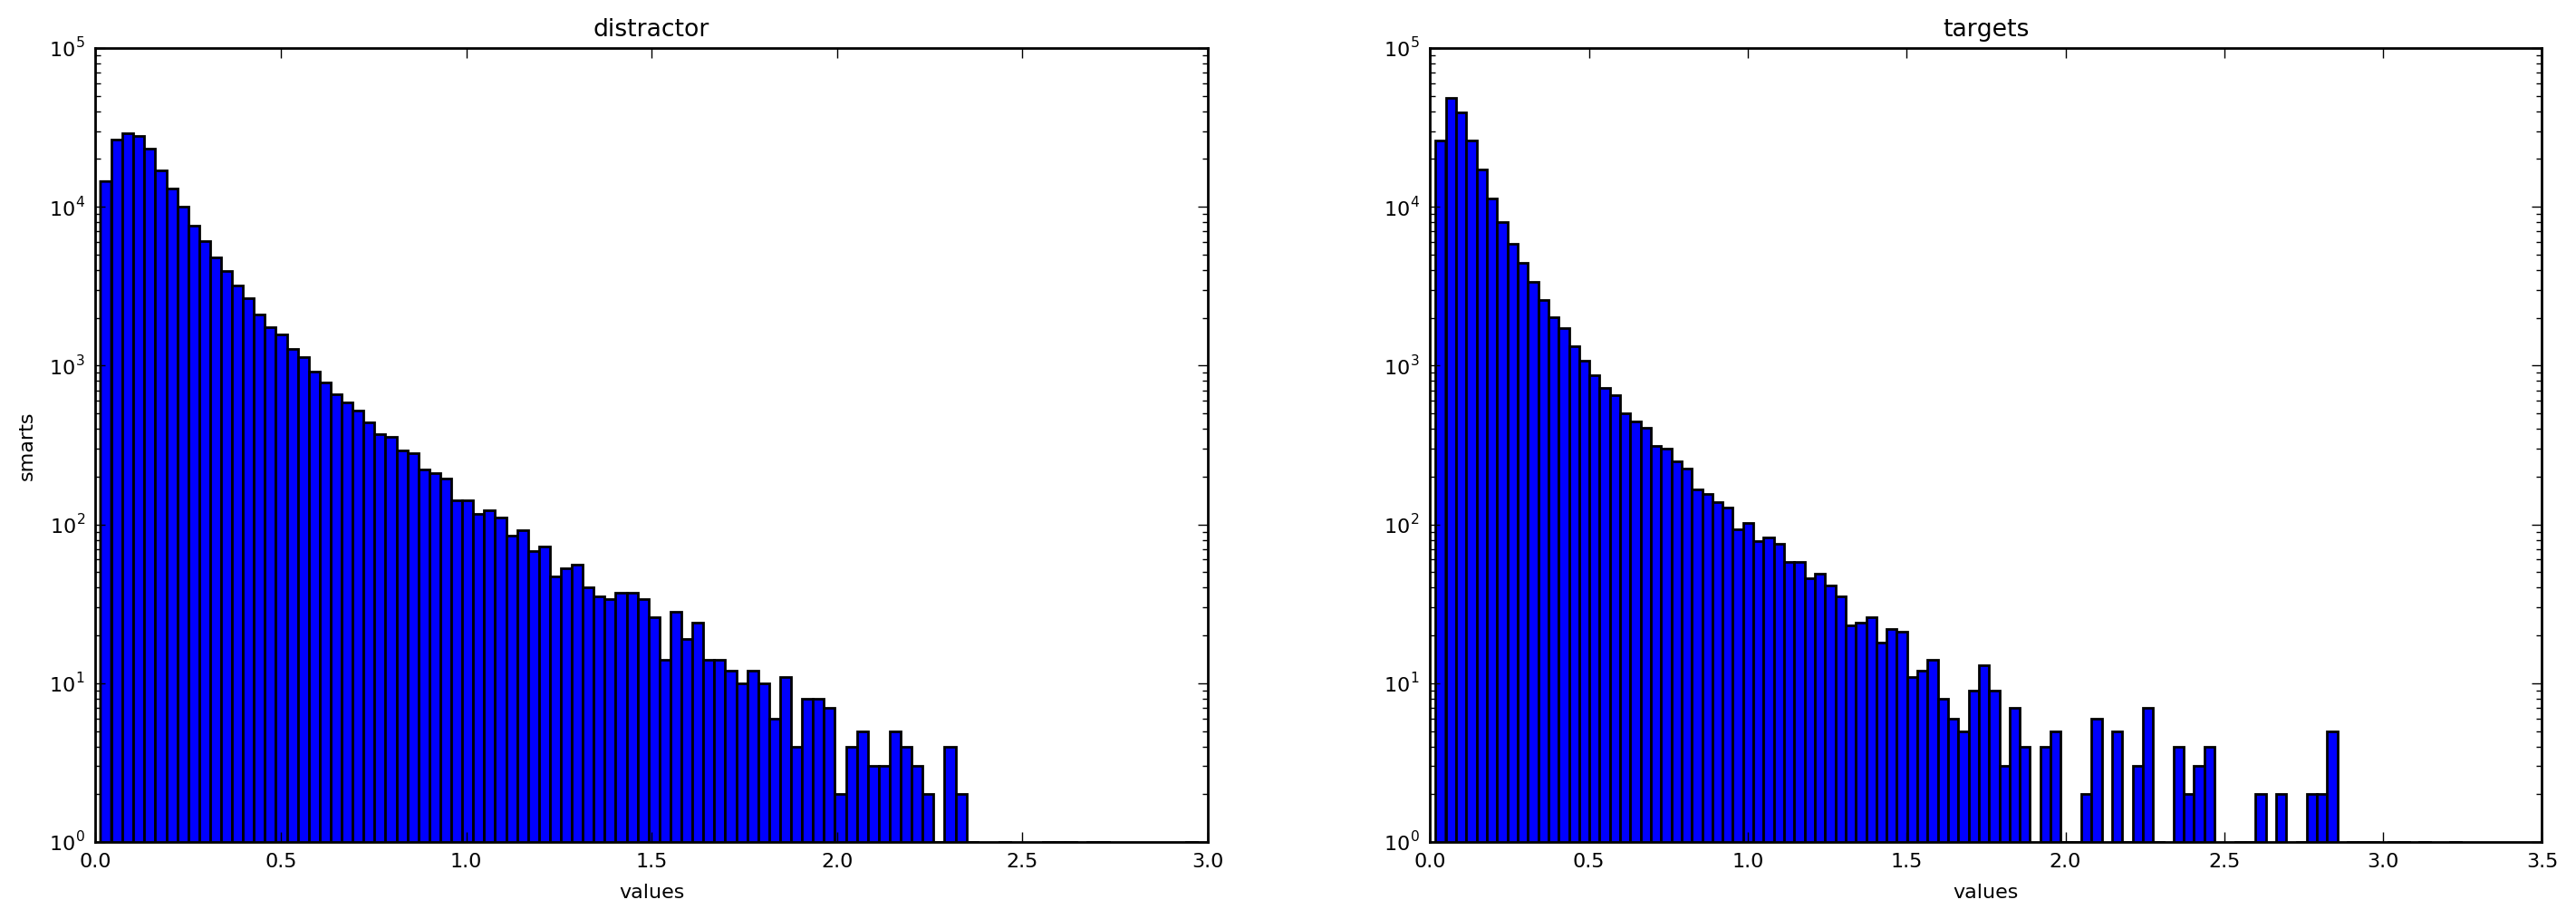

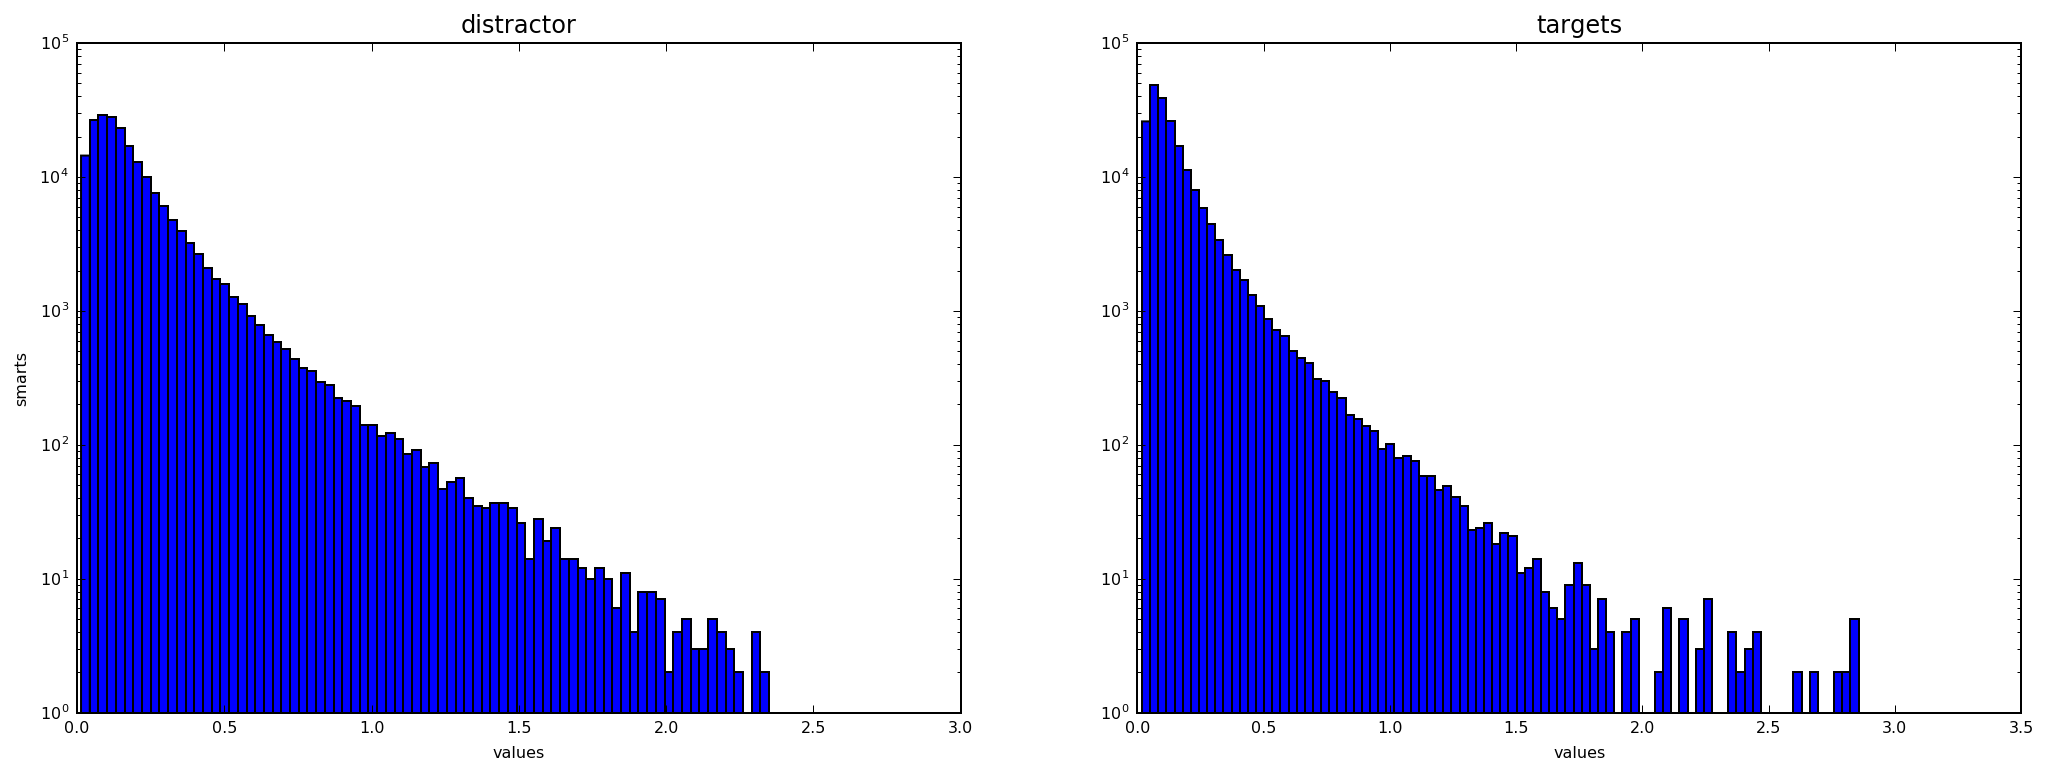

In [42]:
fig = plt.figure(figsize=(18, 6))
ax1 = fig.add_subplot(121); ax2 = fig.add_subplot(122)
ax1.set_xlabel('values'); ax2.set_xlabel('values'); ax1.set_ylabel('smarts')
ax1.set_title('distractor'); ax2.set_title('targets')
_ = ax1.hist(value_distractors.ravel(), 100, log=True)
_ = ax2.hist(value_targets.ravel(), 100, log=True)

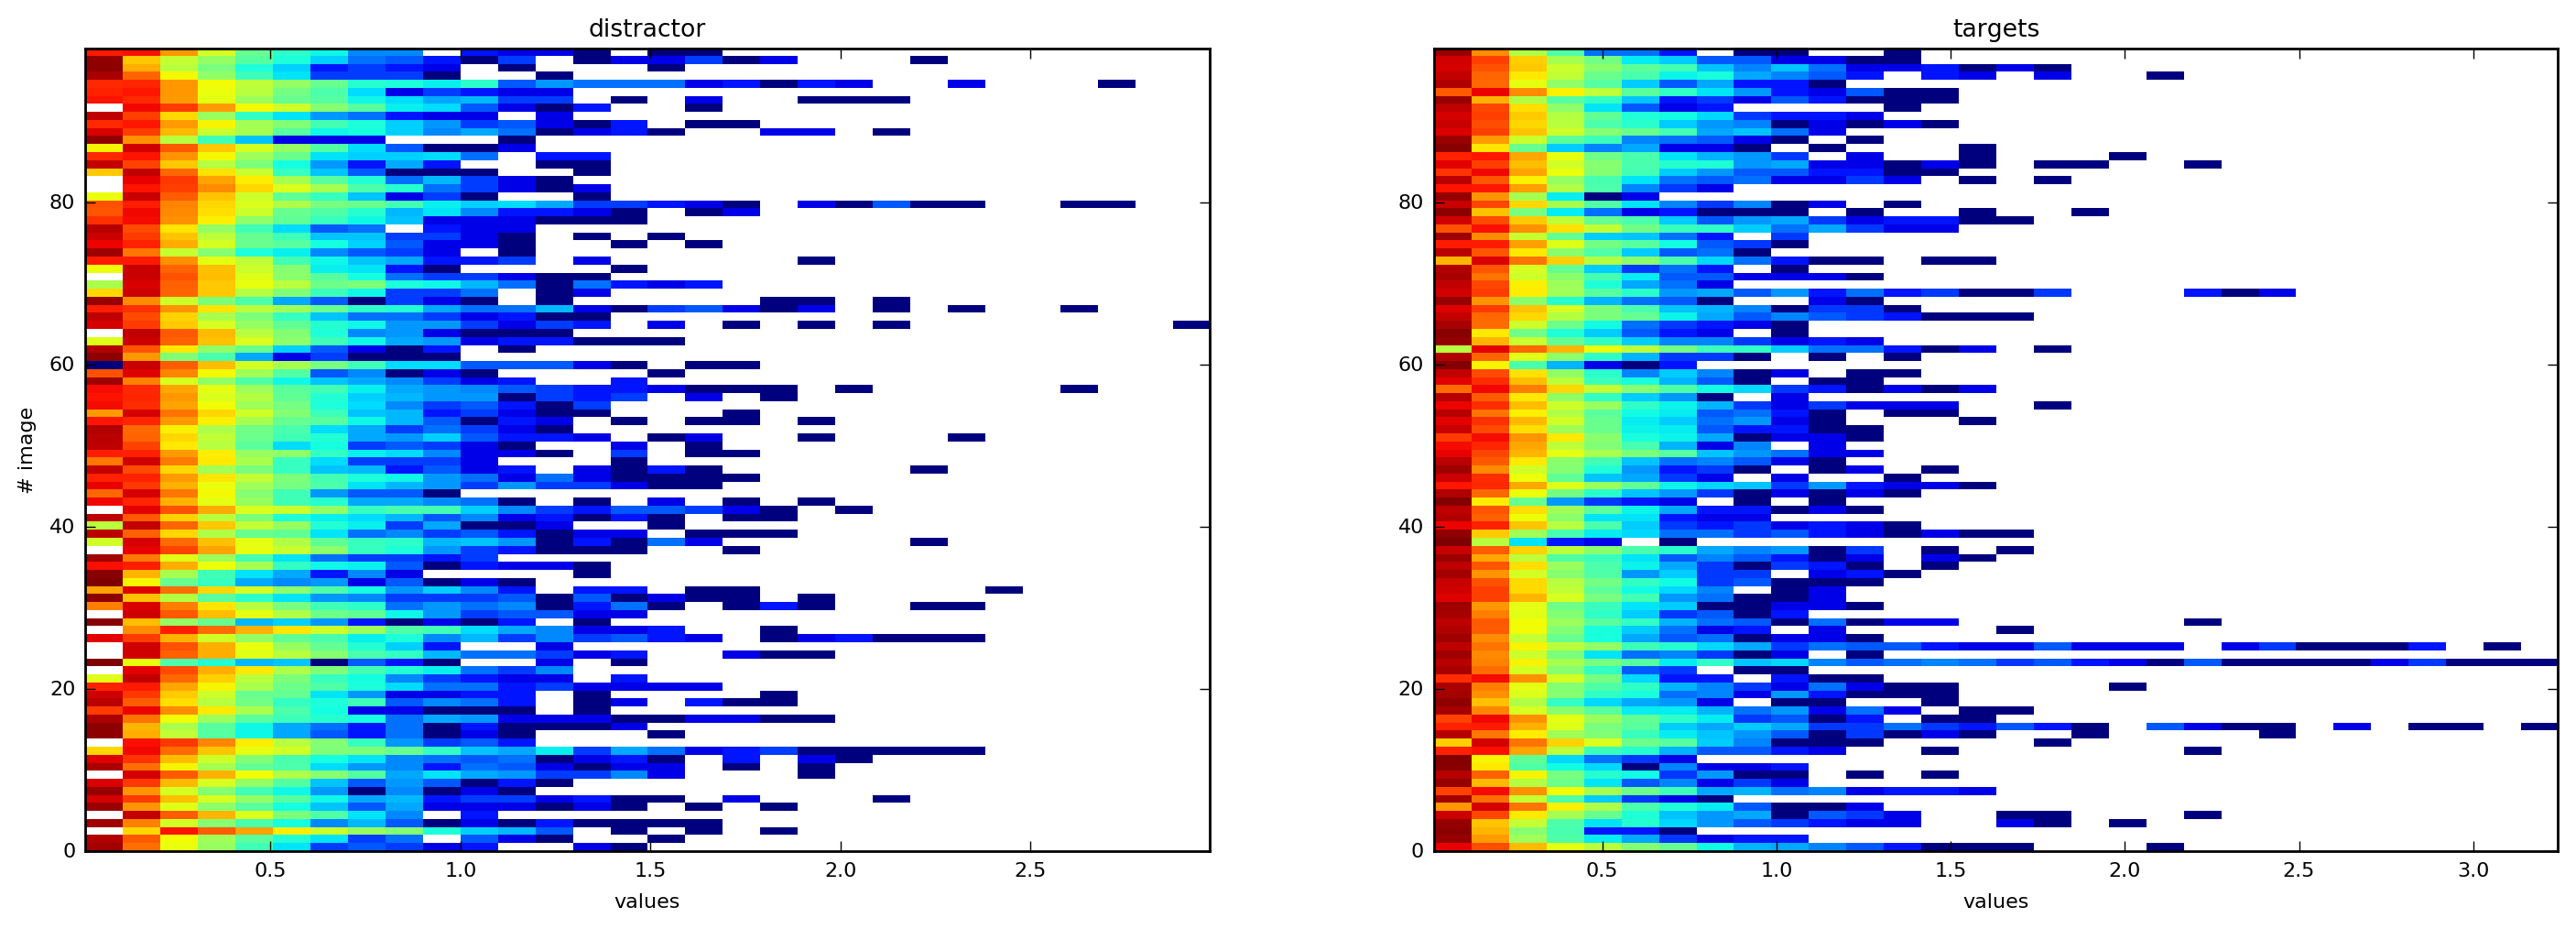

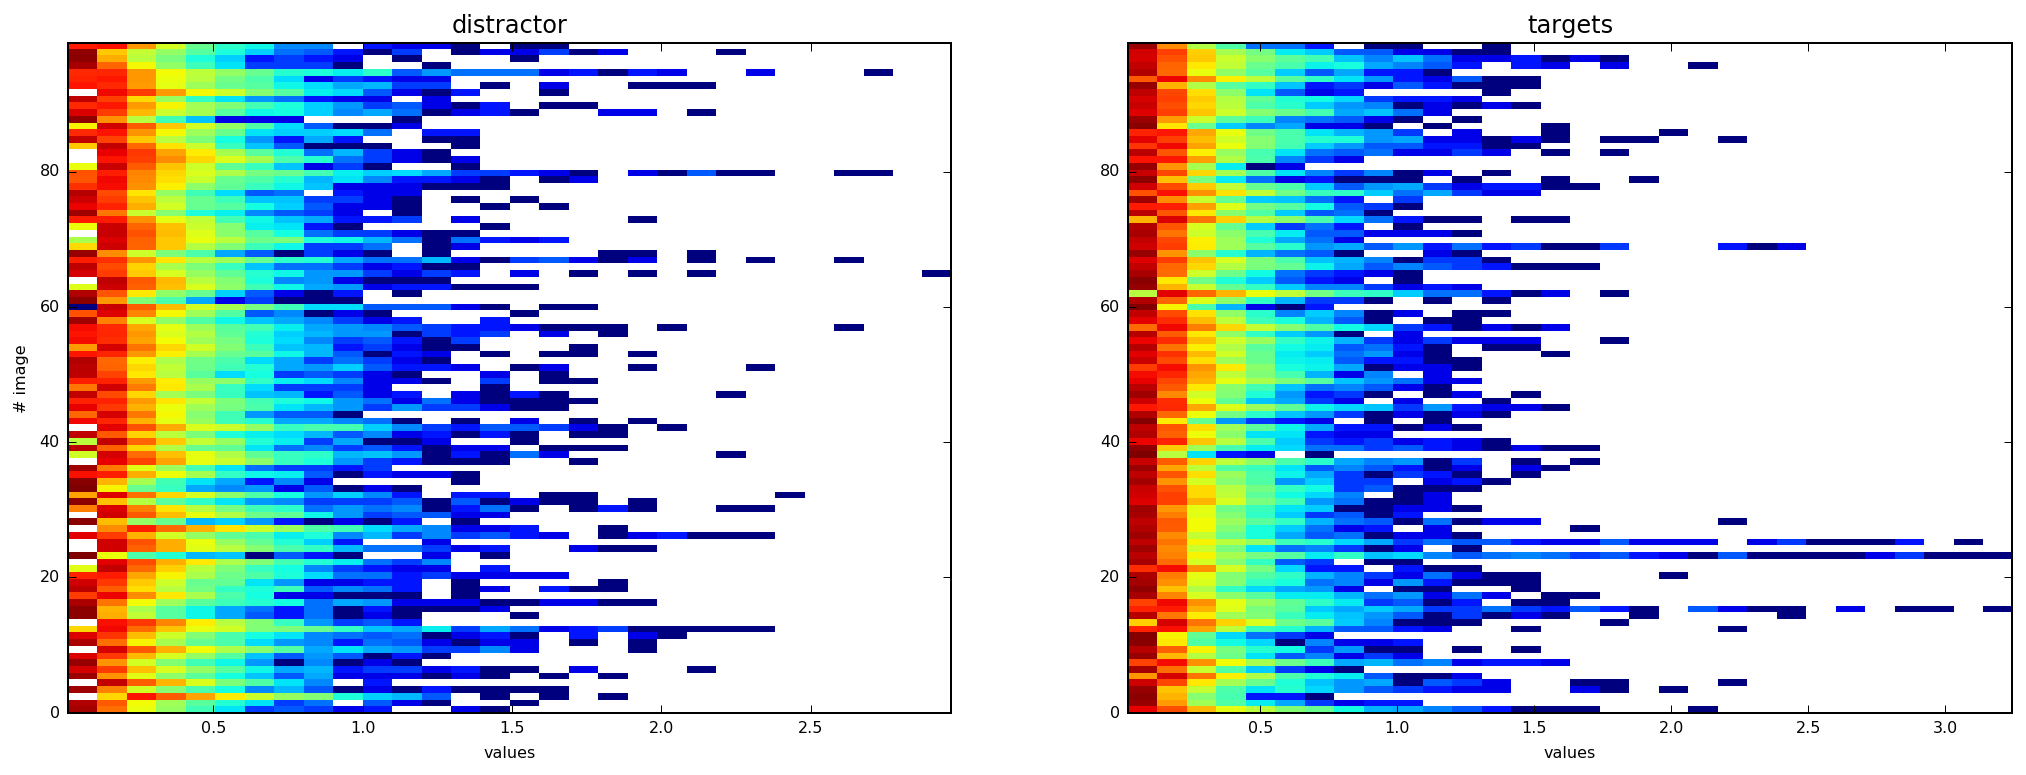

In [43]:
fig = plt.figure(figsize=(18, 6))
import matplotlib
ax1 = fig.add_subplot(121); ax2 = fig.add_subplot(122)
ax1.set_xlabel('values'); ax2.set_xlabel('values'); ax1.set_ylabel('# image')
ax1.set_title('distractor'); ax2.set_title('targets')
_ = ax1.hist2d(value_distractors.ravel(), indices.ravel(), [30, value_distractors.shape[1]], norm=matplotlib.colors.LogNorm())
_ = ax2.hist2d(value_targets.ravel(), indices.ravel(), [30, value_targets.shape[1]], norm=matplotlib.colors.LogNorm())

Sparseness score

In [44]:
print ('energy ', [np.sqrt((Value**2).mean()) for Value in [value_distractors, value_targets]])
print ('mean ', [Value.mean() for Value in [value_distractors, value_targets]])
print ('median ', [np.median(Value) for Value in [value_distractors, value_targets]])
print ('sparseness ', [Value.mean()/np.median(Value) for Value in [value_distractors, value_targets]])
#plt.hist?

energy  [0.25570400382340247, 0.2109473792295907]
mean  [0.18666690492700788, 0.14853587057162523]
median  [0.13666350296680629, 0.1045095624487658]
sparseness  [1.3658870208555003, 1.4212658353099761]
energy  [0.25570400382340247, 0.2109473792295907]
mean  [0.18666690492700788, 0.14853587057162523]
median  [0.13666350296680629, 0.1045095624487658]
sparseness  [1.3658870208555003, 1.4212658353099761]


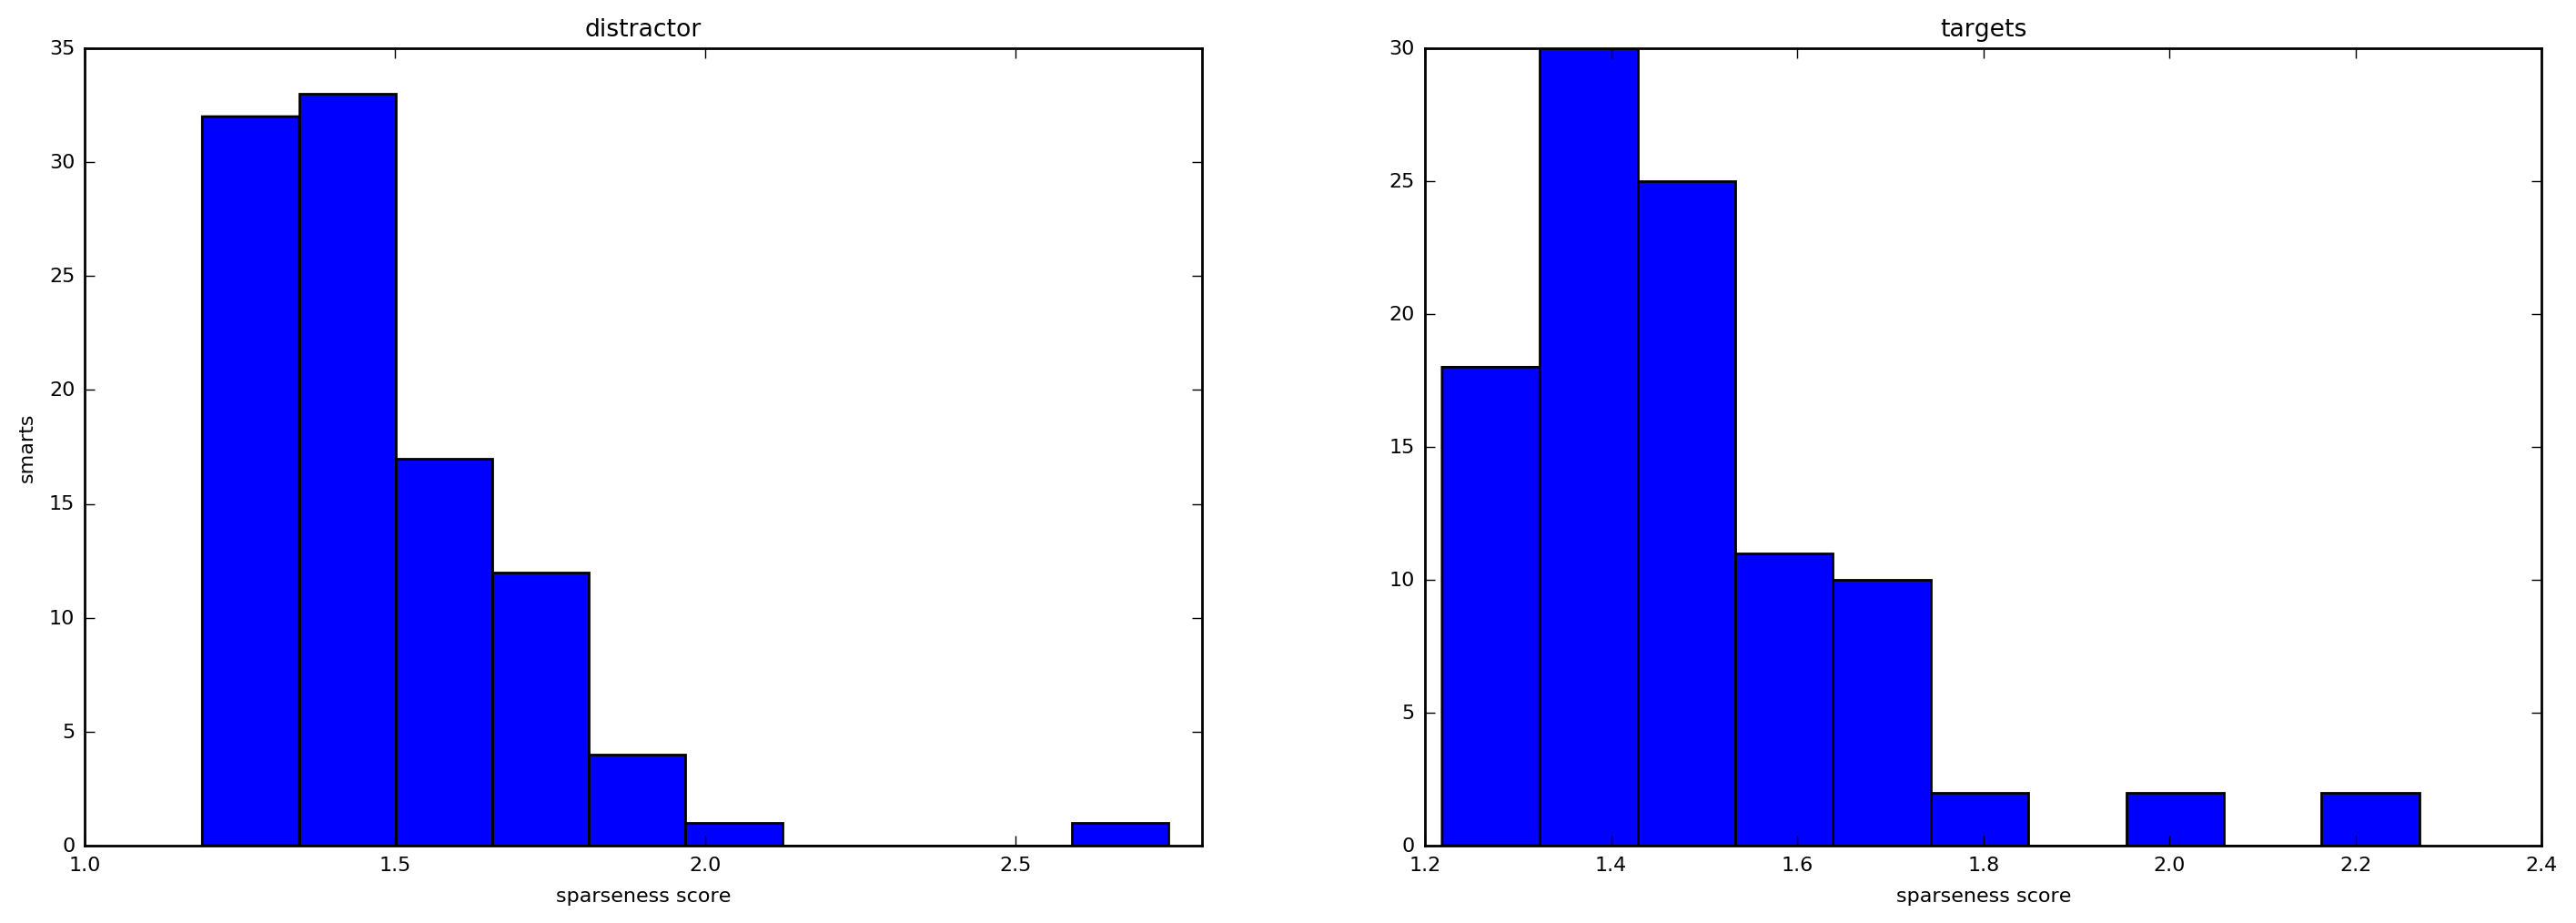

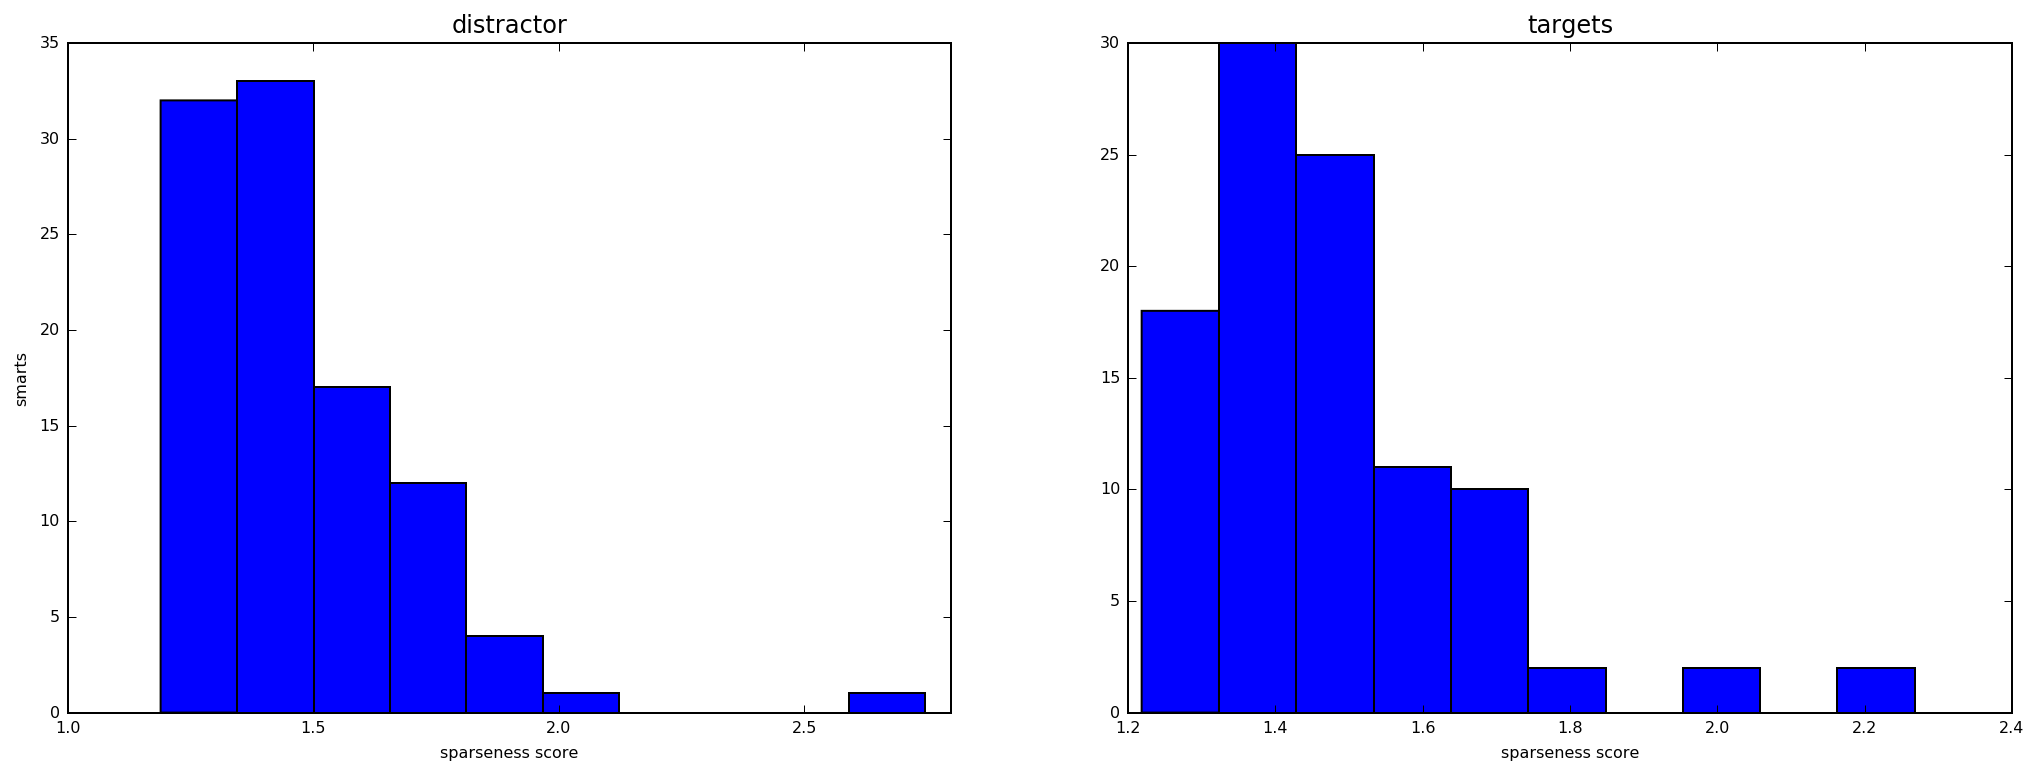

In [45]:
fig = plt.figure(figsize=(18, 6))
ax1 = fig.add_subplot(121); ax2 = fig.add_subplot(122)
ax1.set_xlabel('sparseness score'); ax2.set_xlabel('sparseness score'); ax1.set_ylabel('smarts')
ax1.set_title('distractor'); ax2.set_title('targets')
_ = ax1.hist(value_distractors.mean(axis=0)/np.median(value_distractors, axis=0))
_ = ax2.hist(value_targets.mean(axis=0)/np.median(value_targets, axis=0))

Computing a fit of activities with a power law

In [46]:
from scipy.stats import powerlaw

shape = np.zeros(value_distractors.shape[1])
for i_image in range(value_distractors.shape[1]):
    shape[i_image], loc, scale = powerlaw.fit(value_distractors[:, i_image])
print (shape.mean(), shape.std())
    

0.309868195103 0.0895320793313
0.309868195103 0.0895320793313


Such that we can compare the sparseness strength for different image sizes

In [47]:
if False: #for size, size_str in zip([16, 32, 128, 256], ['_016', '_032', '_128', '']):
    imagelist, edgeslist_distractors, RMSE = mp.process(exp='testing_vanilla' + size_str, name_database='serre07_distractors')
    value_distractors = edgeslist_distractors[4, :, :]
    shape = np.zeros(value_distractors.shape[1])
    for i_image in range(value_distractors.shape[1]):
        shape[i_image], loc, scale = powerlaw.fit(value_distractors[:, i_image])
    print (shape.mean(), shape.std())


statistics of phase

1.07340006066


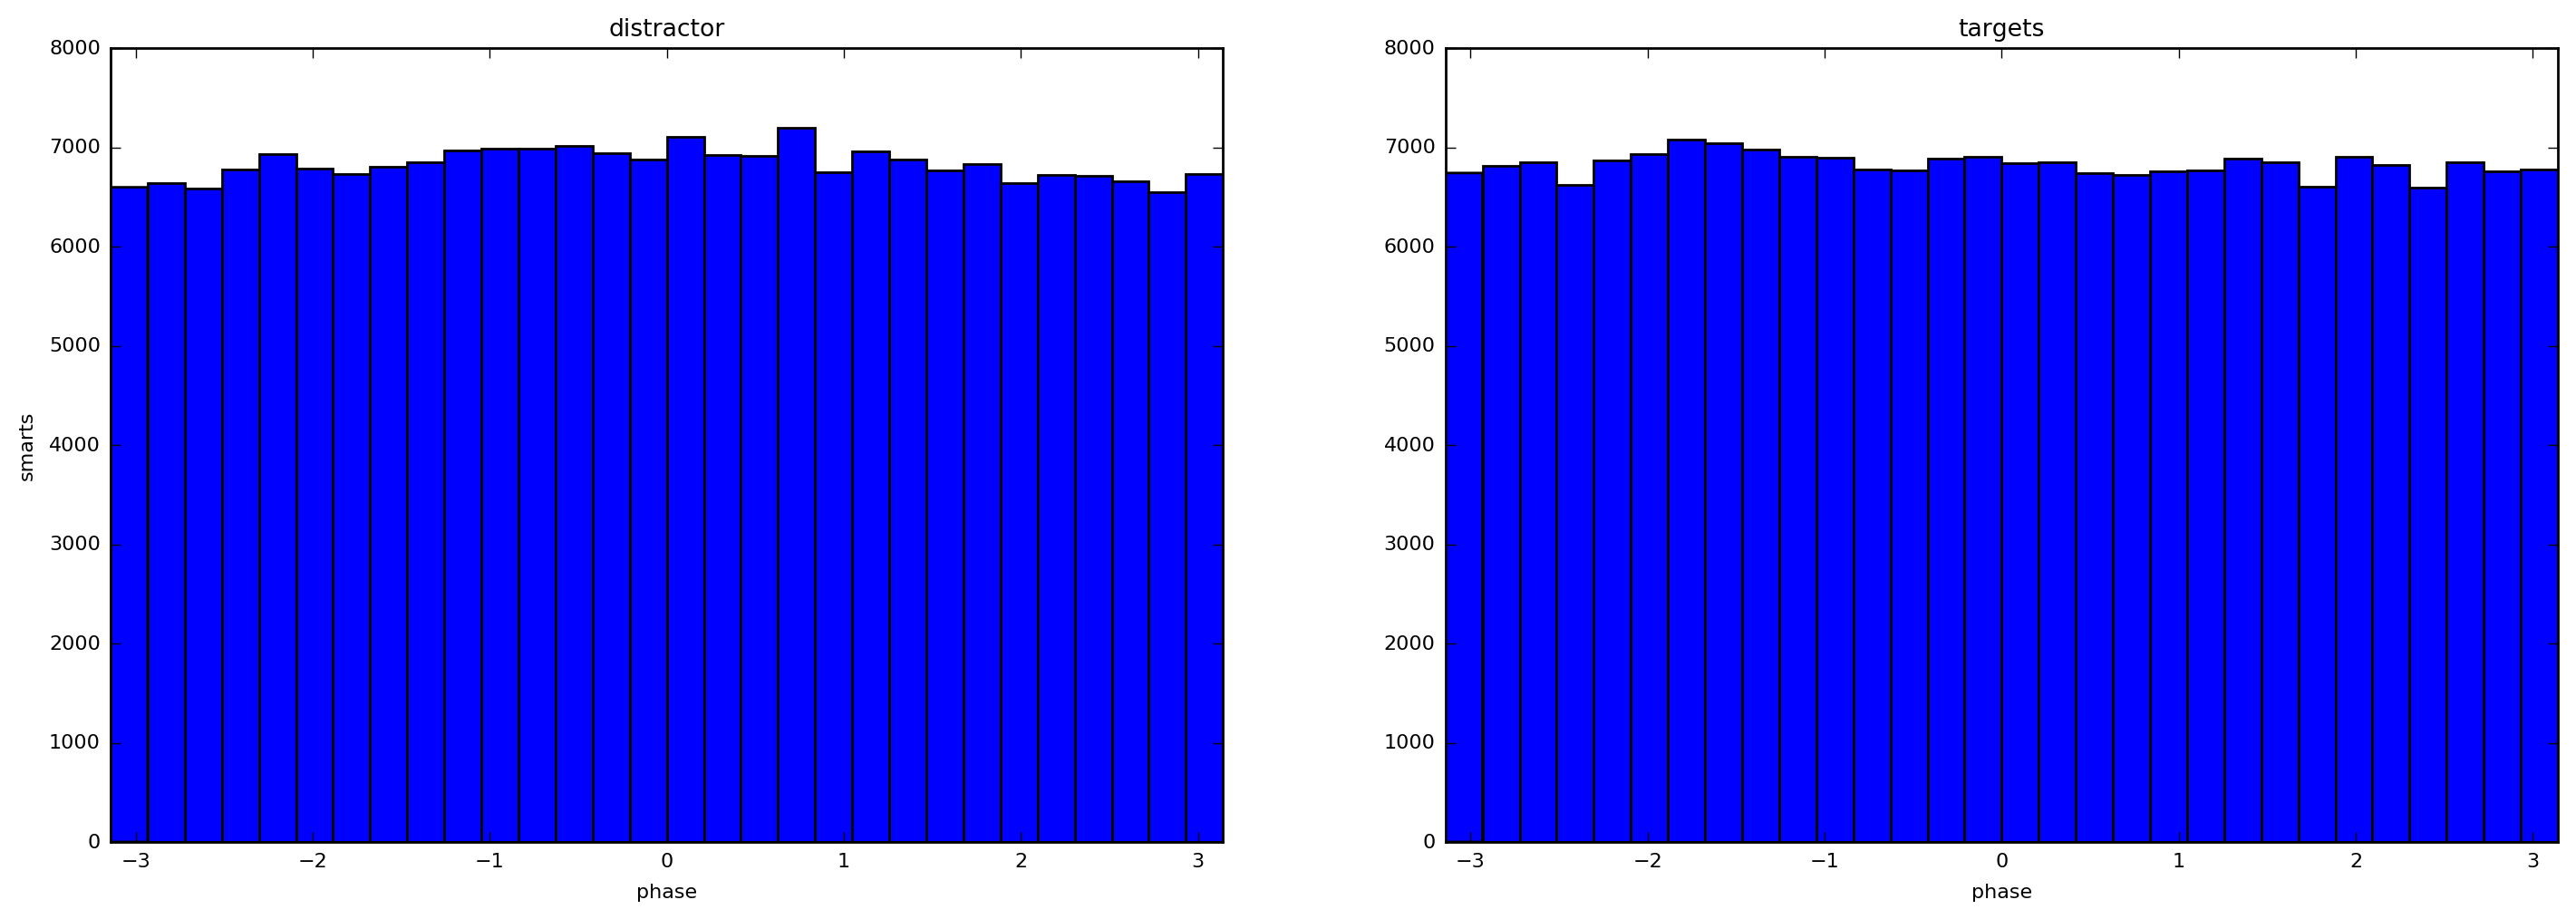

1.07340006066


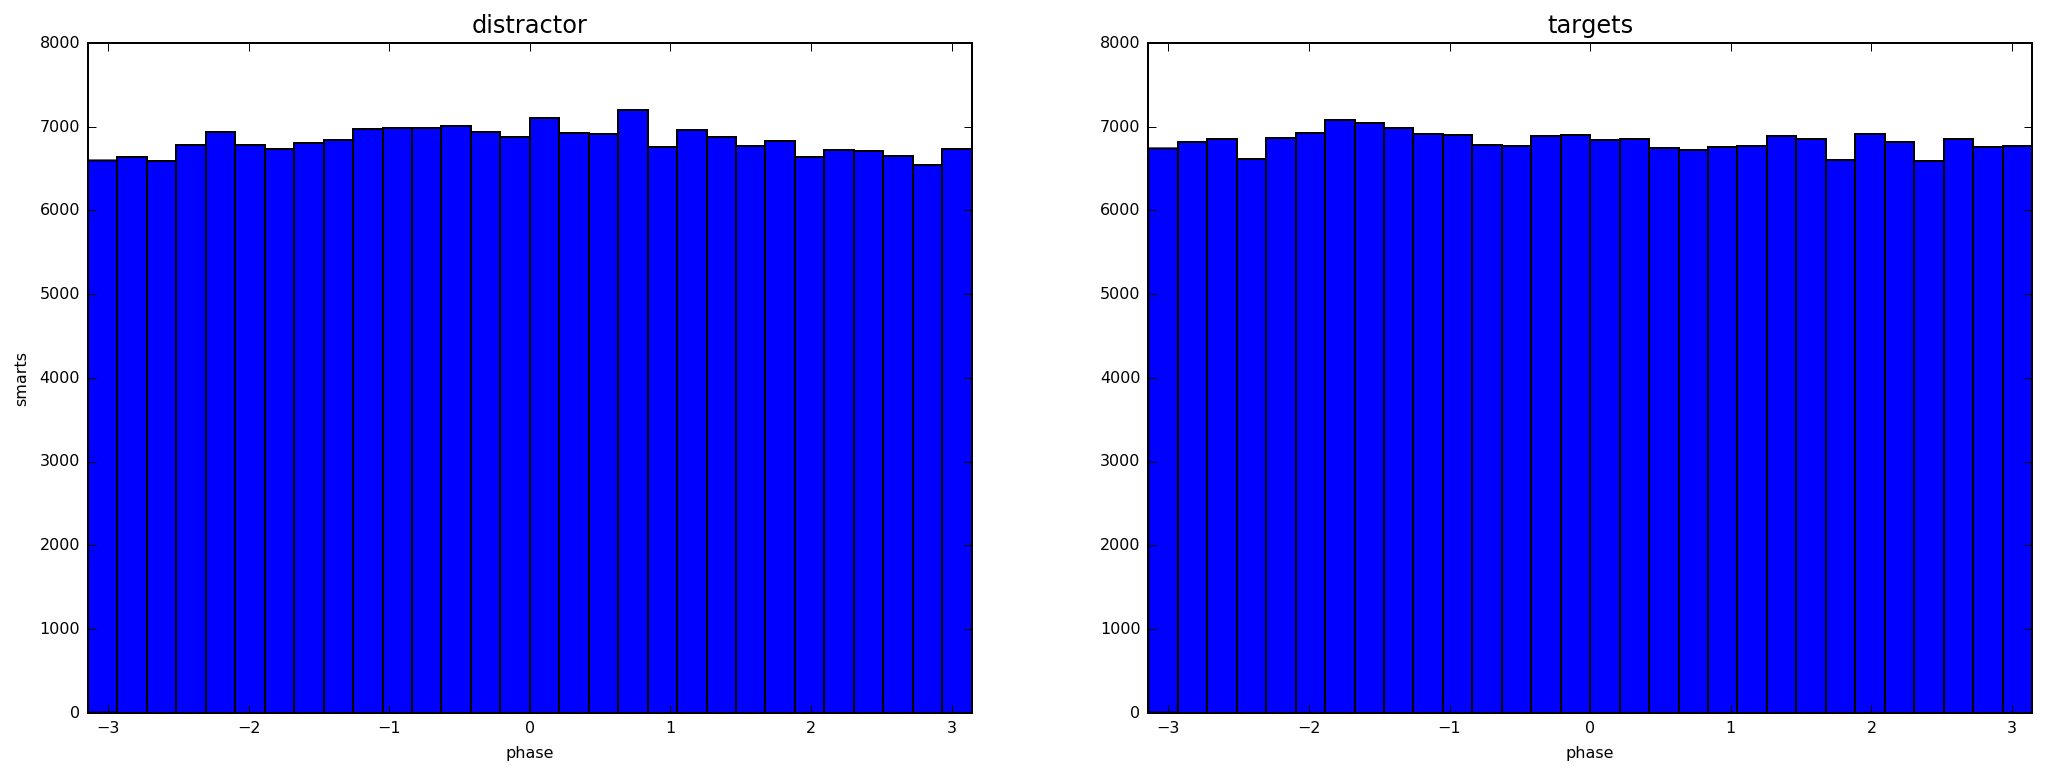

In [48]:
fig = plt.figure(figsize=(18, 6))
ax1 = fig.add_subplot(121); ax2 = fig.add_subplot(122)
ax1.set_xlabel('phase'); ax2.set_xlabel('phase'); ax1.set_ylabel('smarts')
ax1.set_title('distractor'); ax2.set_title('targets')
_ = ax1.hist(phase_distractors.ravel(), 30)
ax1.set_xlim([-np.pi, np.pi])
(n, bins, patches)= ax2.hist(phase_targets.ravel(), 30, log=False)
ax2.set_xlim([-np.pi, np.pi])
print (np.max(n)/np.min(n))

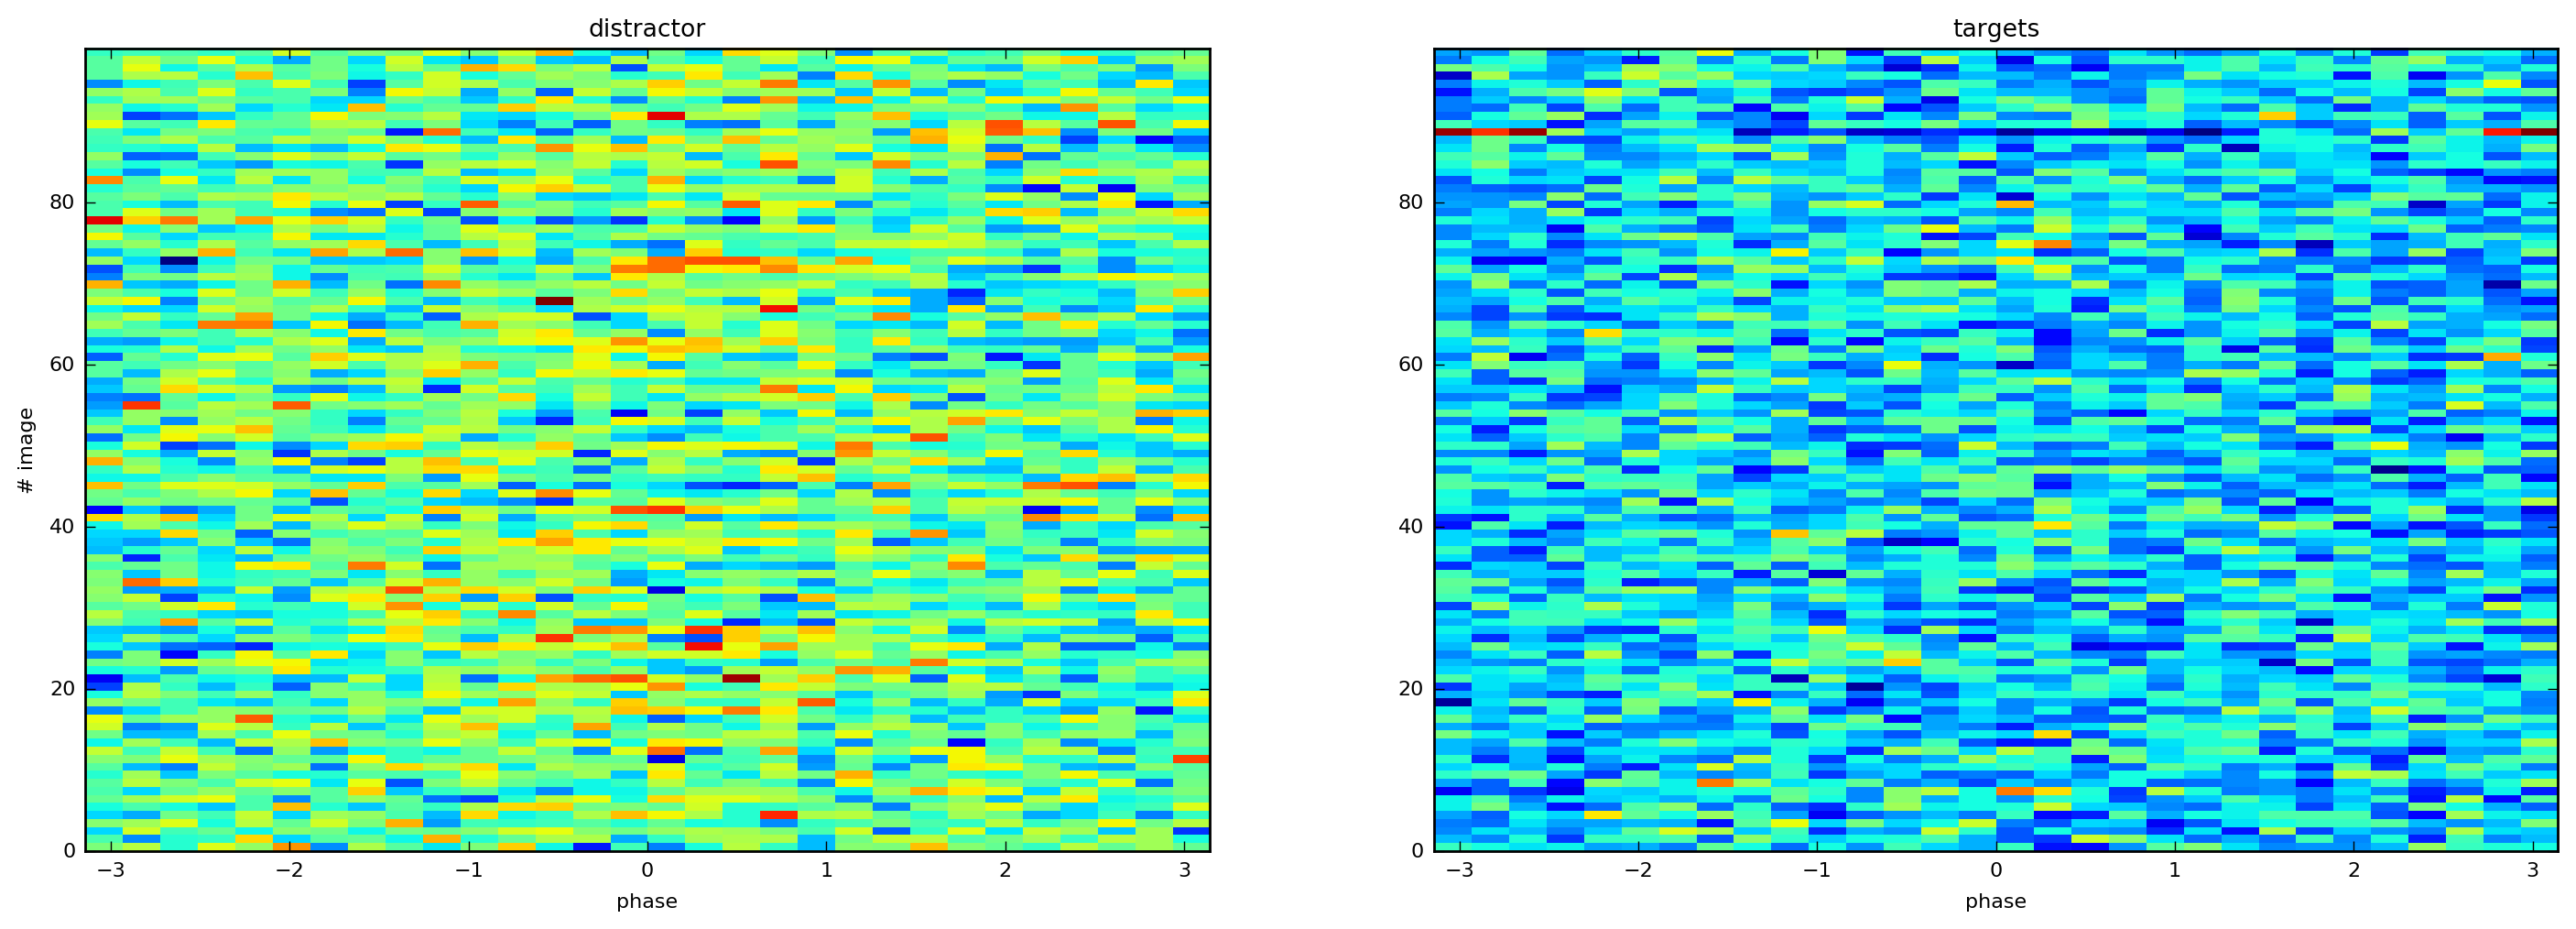

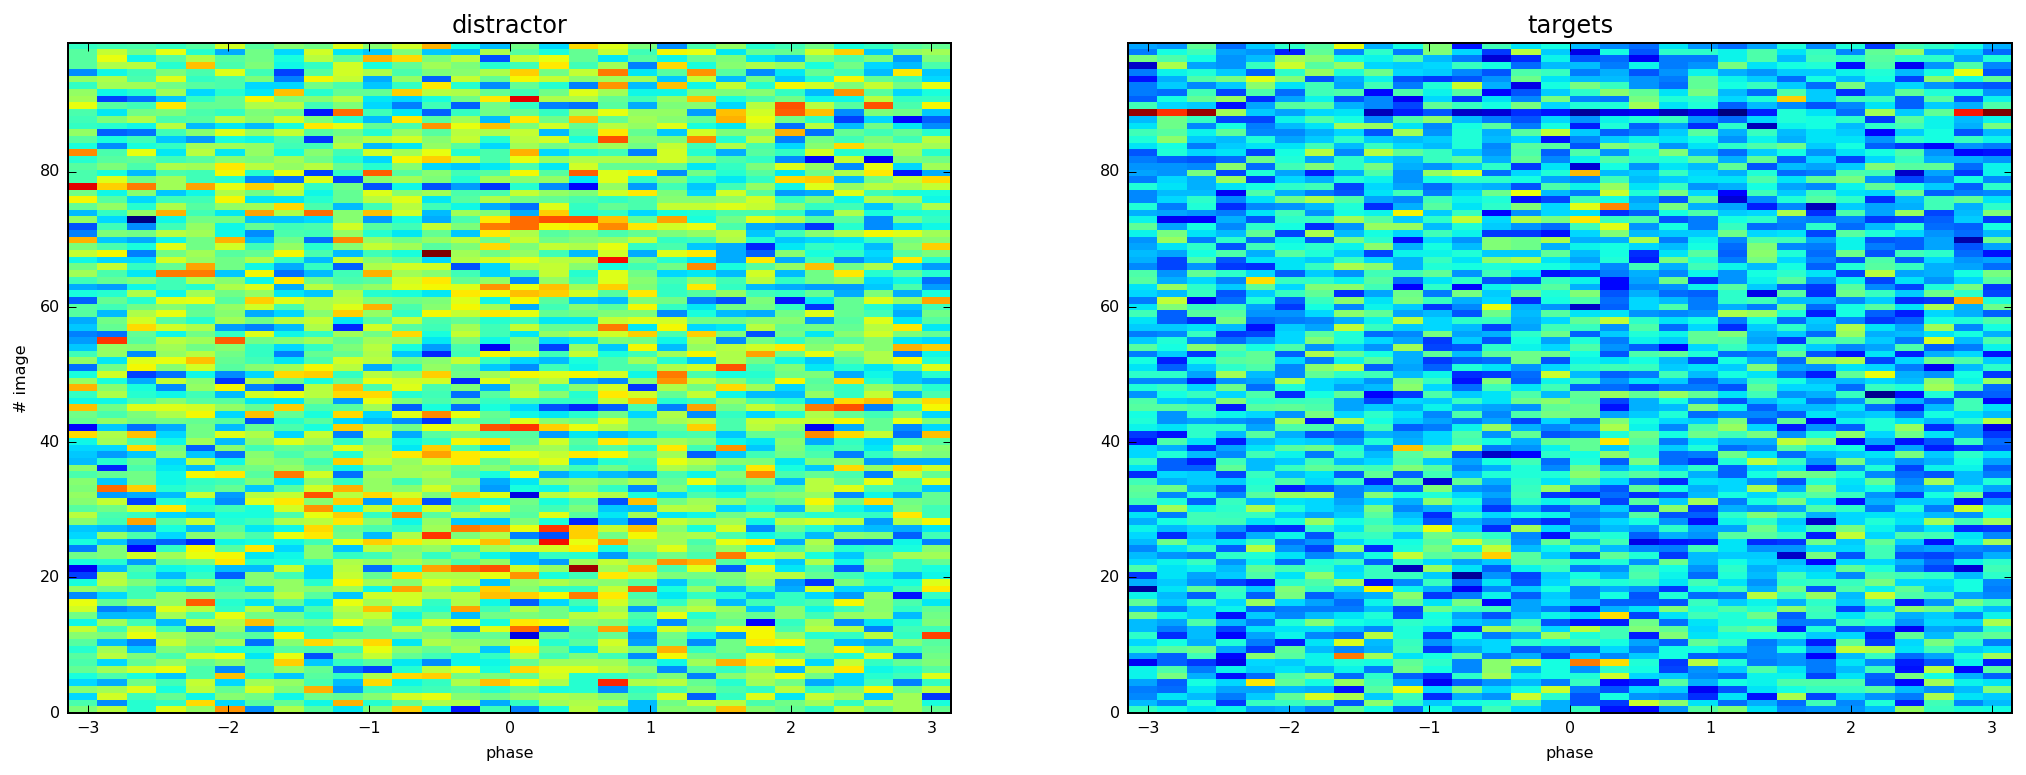

In [49]:
fig = plt.figure(figsize=(18, 6))
ax1 = fig.add_subplot(121); ax2 = fig.add_subplot(122)
ax1.set_xlabel('phase'); ax2.set_xlabel('phase'); ax1.set_ylabel('# image')
ax1.set_title('distractor'); ax2.set_title('targets')
_ = ax1.hist2d(phase_distractors.ravel(), indices.ravel(), [30, value_distractors.shape[1]])
_ = ax2.hist2d(phase_targets.ravel(), indices.ravel(), [30, value_targets.shape[1]])

dependency between value and phase

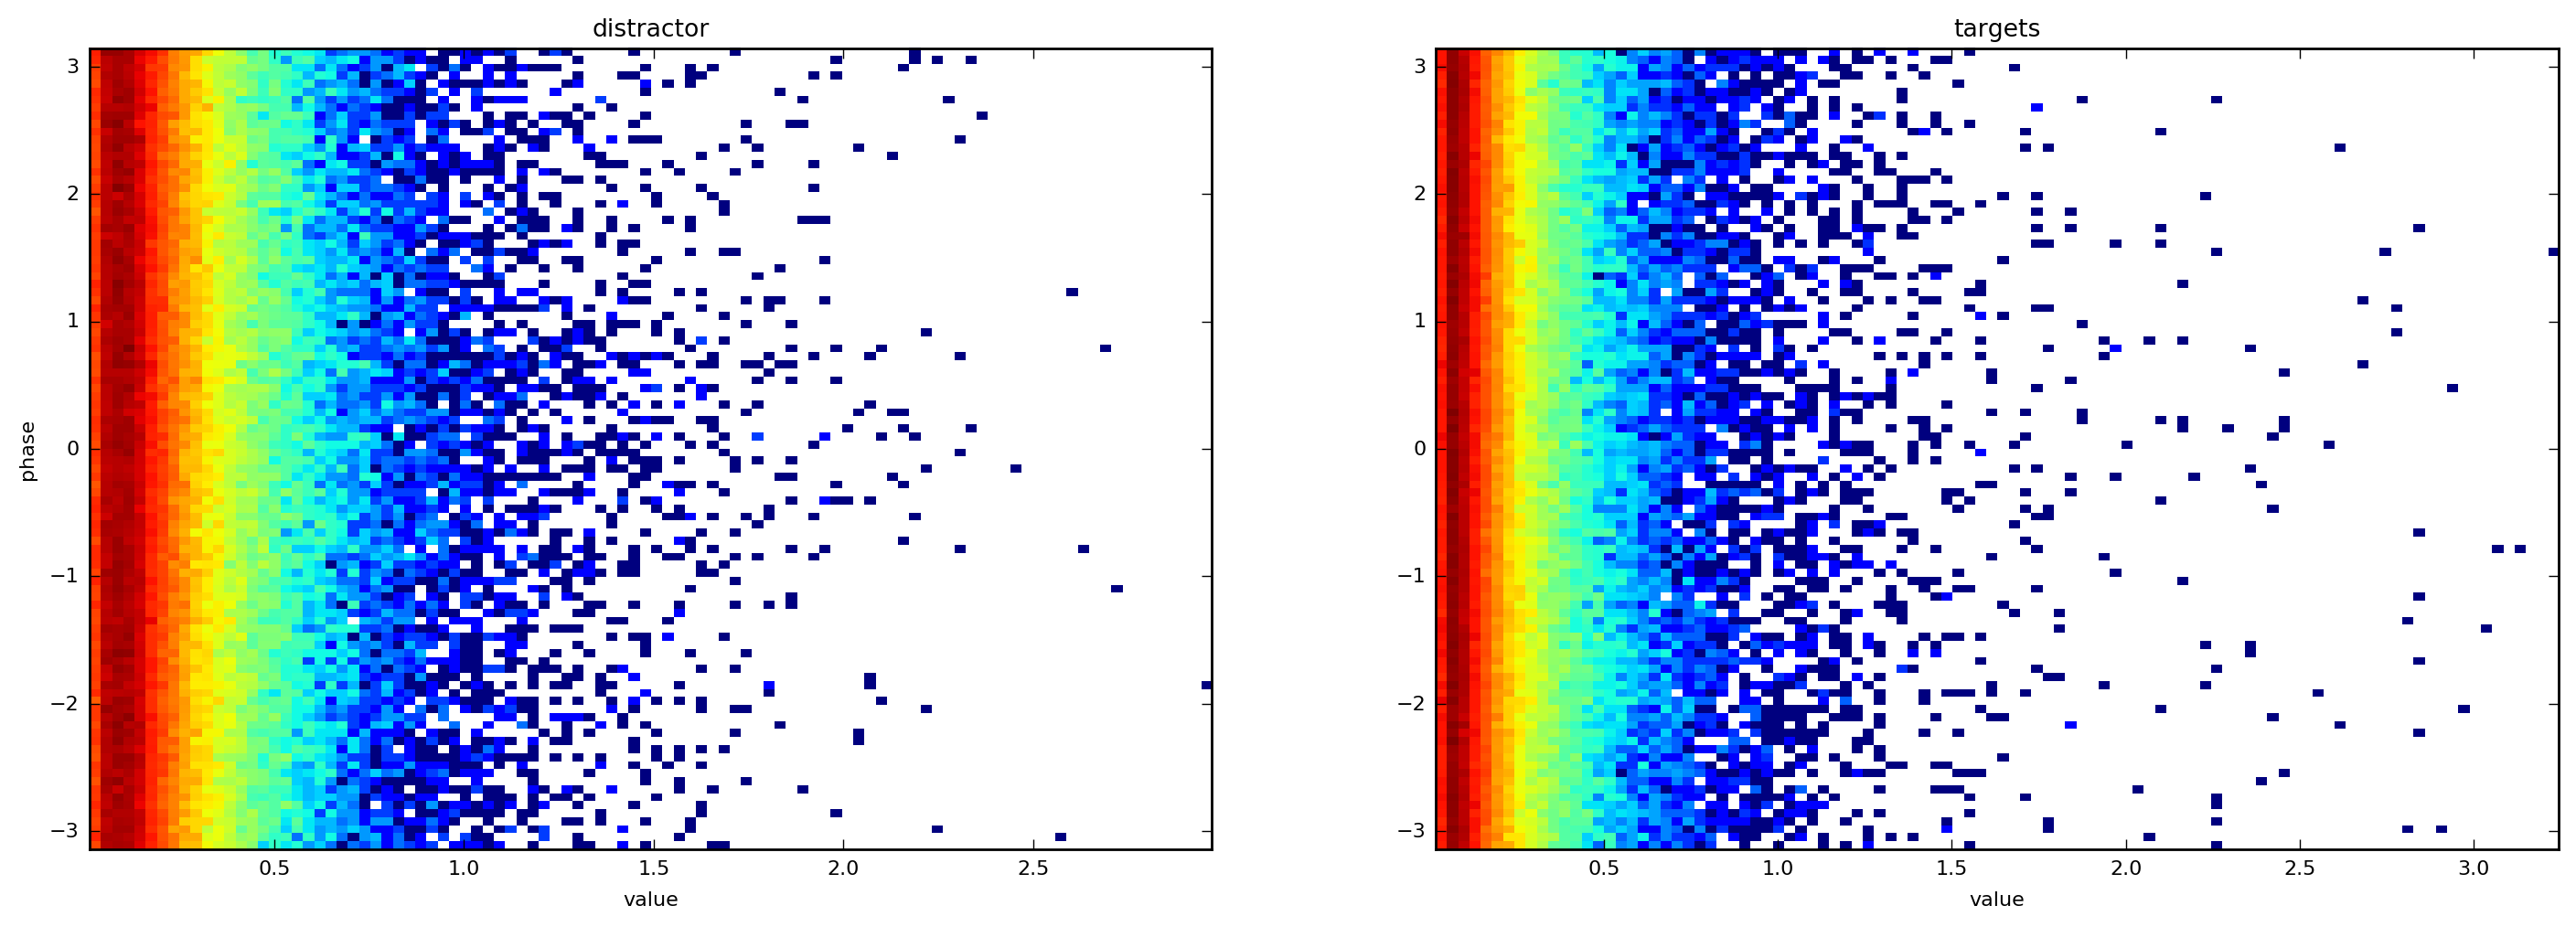

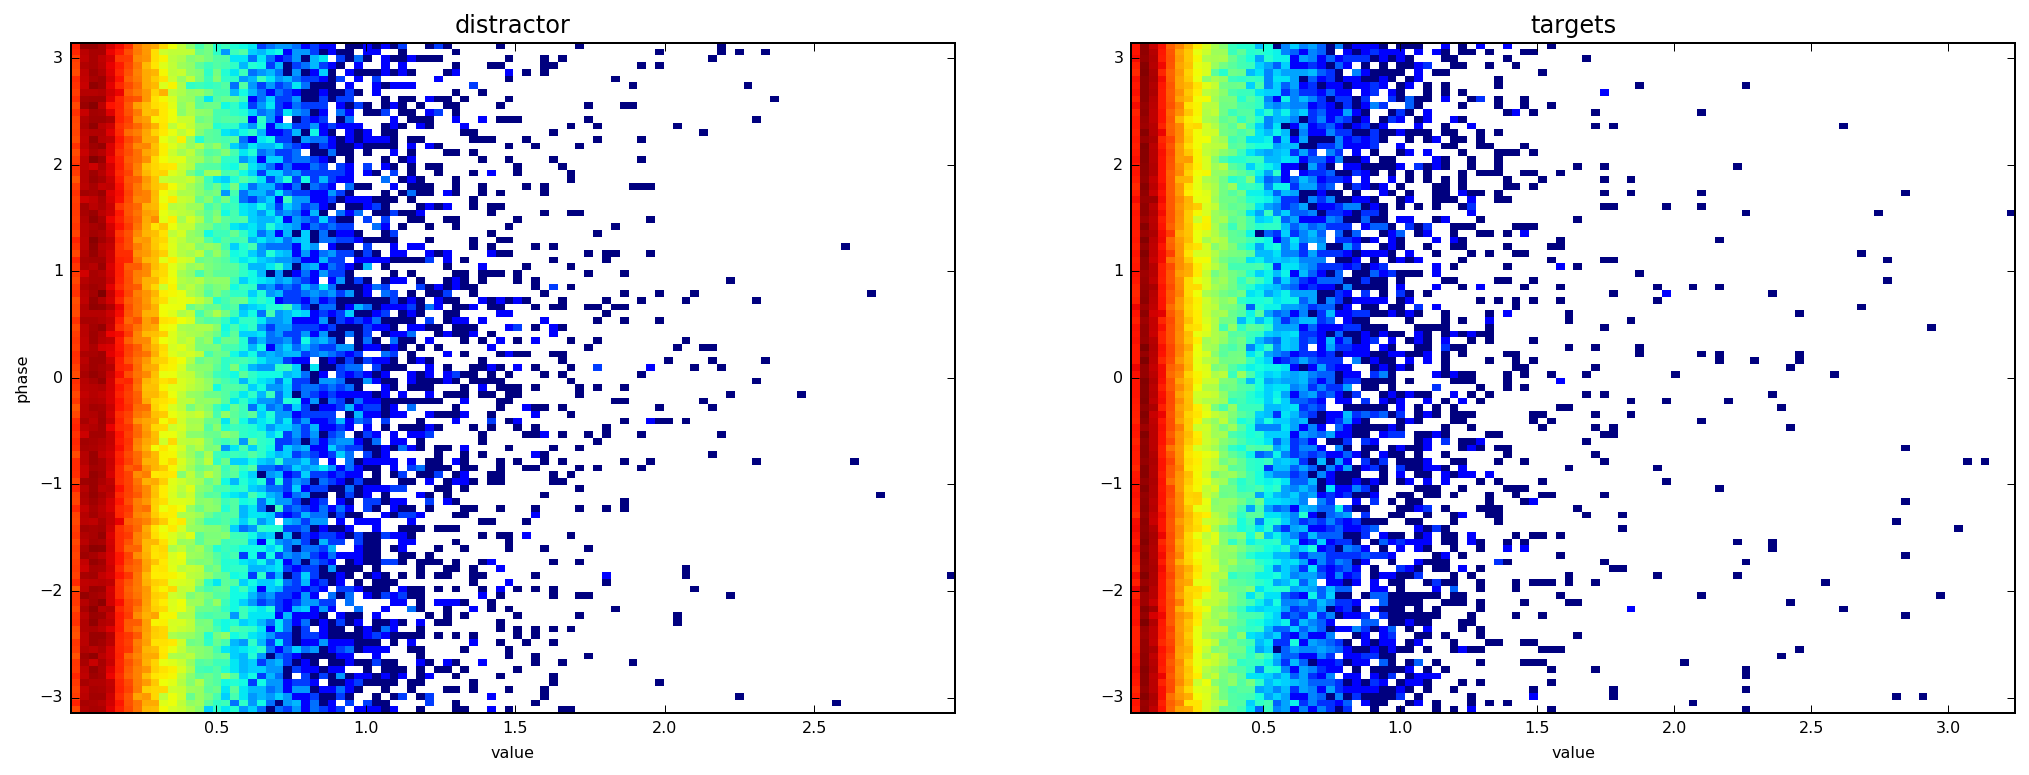

In [50]:
import matplotlib
fig = plt.figure(figsize=(18, 6))
ax1 = fig.add_subplot(121); ax2 = fig.add_subplot(122)
ax1.set_xlabel('value'); ax2.set_xlabel('value'); ax1.set_ylabel('phase')
ax1.set_title('distractor'); ax2.set_title('targets')
_ = ax1.hist2d(value_distractors.ravel(), phase_distractors.ravel(), 100, norm=matplotlib.colors.LogNorm())
_ = ax2.hist2d(value_targets.ravel(), phase_targets.ravel(), 100, norm=matplotlib.colors.LogNorm())


but not specific to a class:

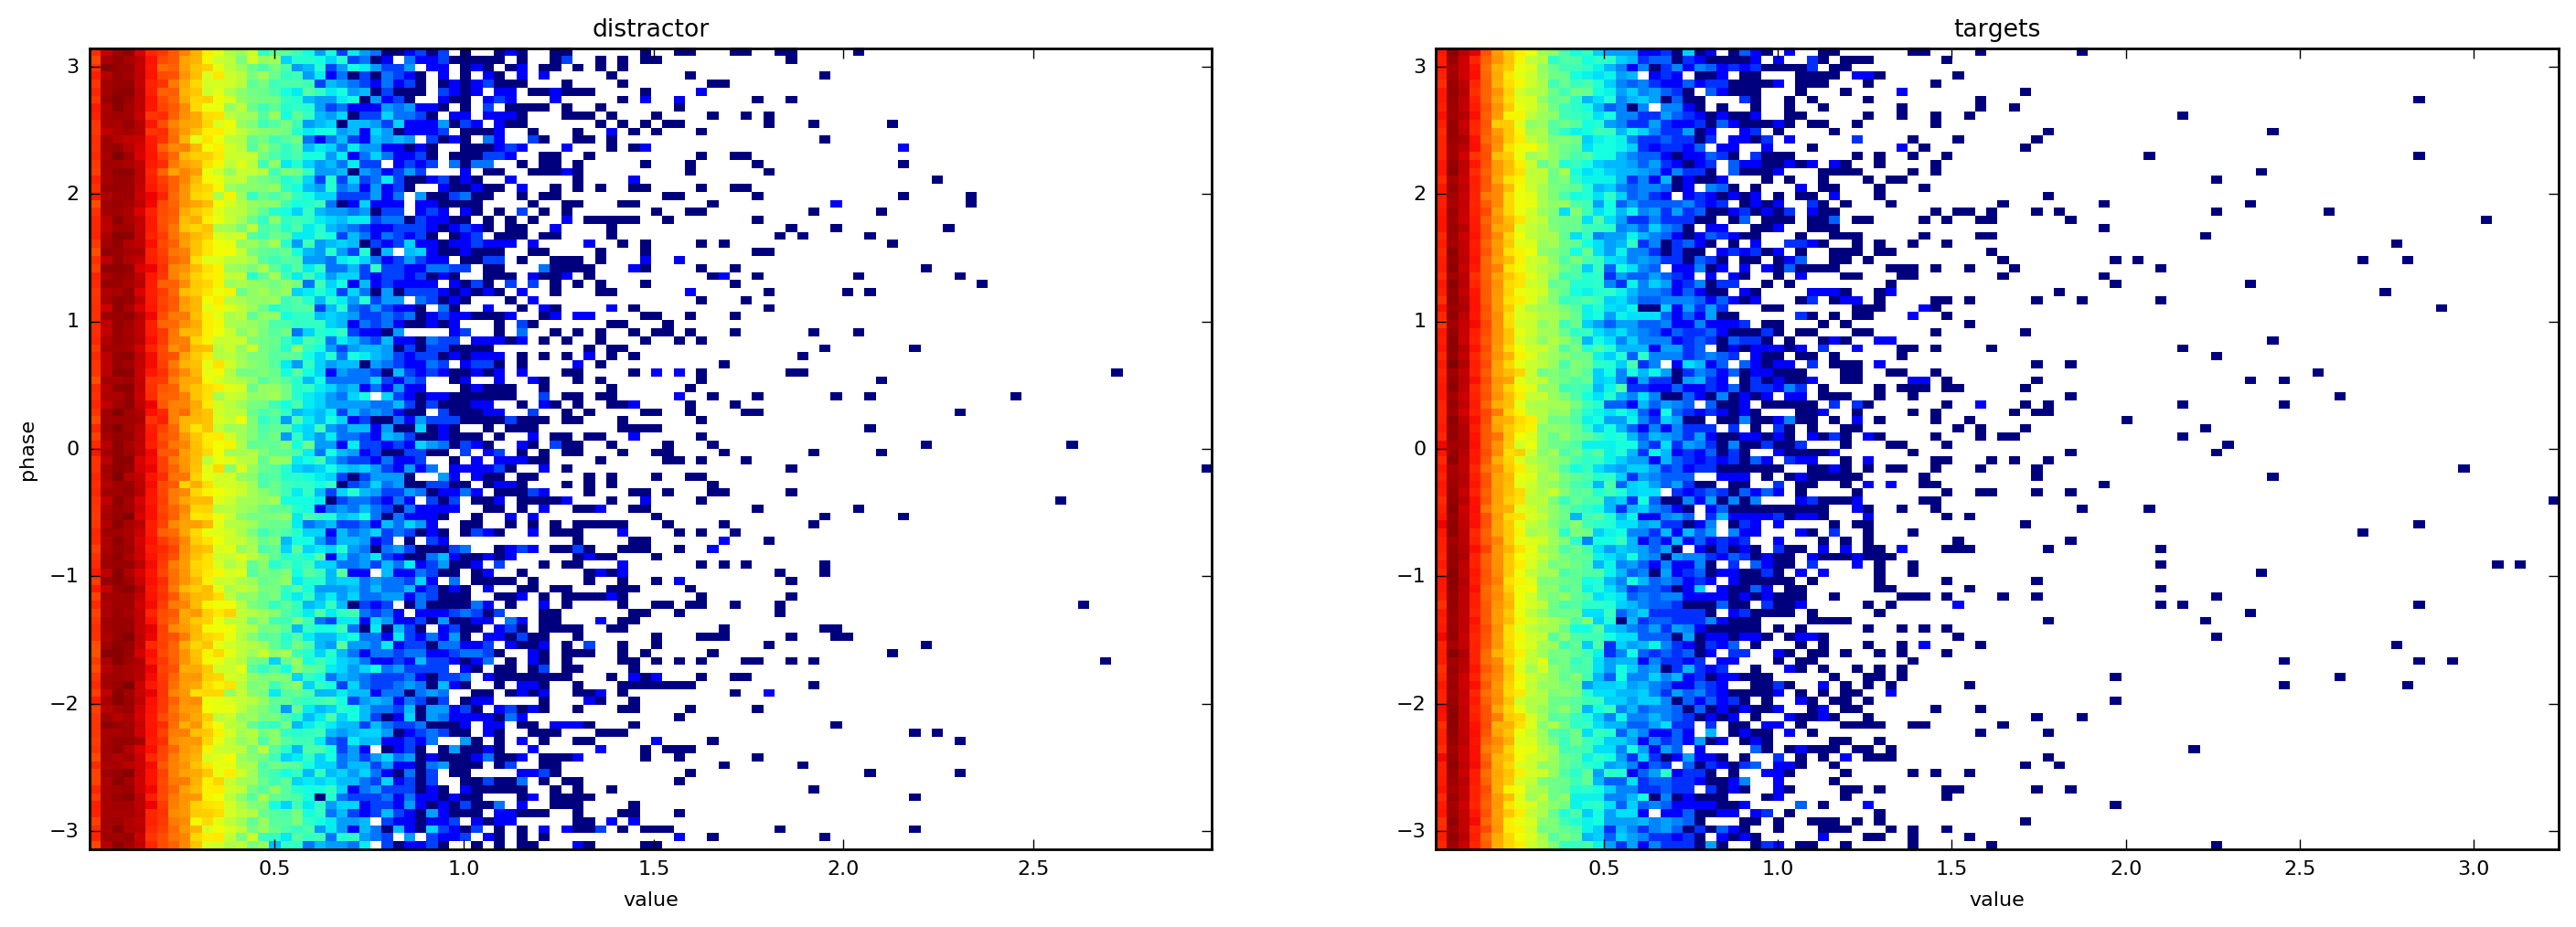

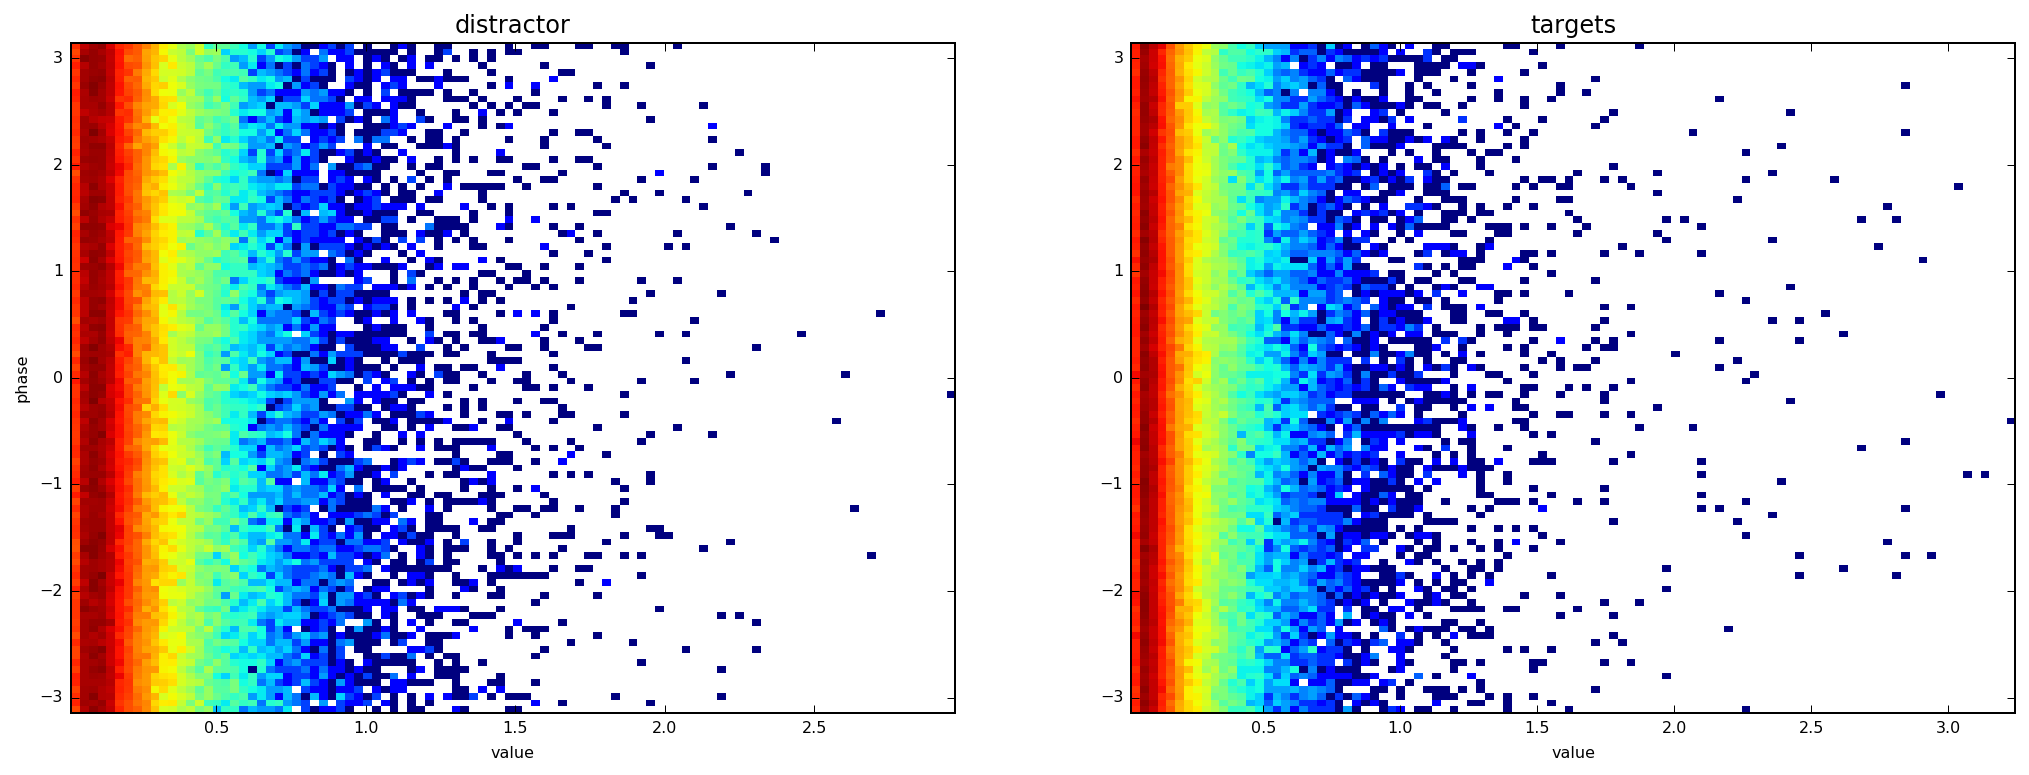

In [51]:
#plt.hist2d?
import matplotlib
fig = plt.figure(figsize=(18, 6))
ax1 = fig.add_subplot(121); ax2 = fig.add_subplot(122)
ax1.set_xlabel('value'); ax2.set_xlabel('value'); ax1.set_ylabel('phase')
ax1.set_title('distractor'); ax2.set_title('targets')
_ = ax1.hist2d(value_distractors.ravel(), phase_targets.ravel(), 100, norm=matplotlib.colors.LogNorm())
_ = ax2.hist2d(value_targets.ravel(), phase_distractors.ravel(), 100, norm=matplotlib.colors.LogNorm())

relation between sparseness and phase

In [52]:
#fig = plt.figure(figsize=(18, 6))
#ax1 = fig.add_subplot(121); ax2 = fig.add_subplot(122)
#ax1.set_xlabel('sparseness score'); ax2.set_xlabel('sparseness score'); ax1.set_ylabel('smarts')
#ax1.set_title('distractor'); ax2.set_title('targets')
#_ = ax1.hist2d(Value_distractors.mean(axis=0)/np.median(Value_distractors, axis=0), 100)
#_ = ax2.hist2d(Value_targets.mean(axis=0)/np.median(Value_targets, axis=0), 100)

relation between sparseness and scale

[-7.6363 -6.9421 -6.2479 -5.5537 -4.8595 -4.1653 -3.4711 -2.7768 -2.0826
 -1.3884 -0.6942]


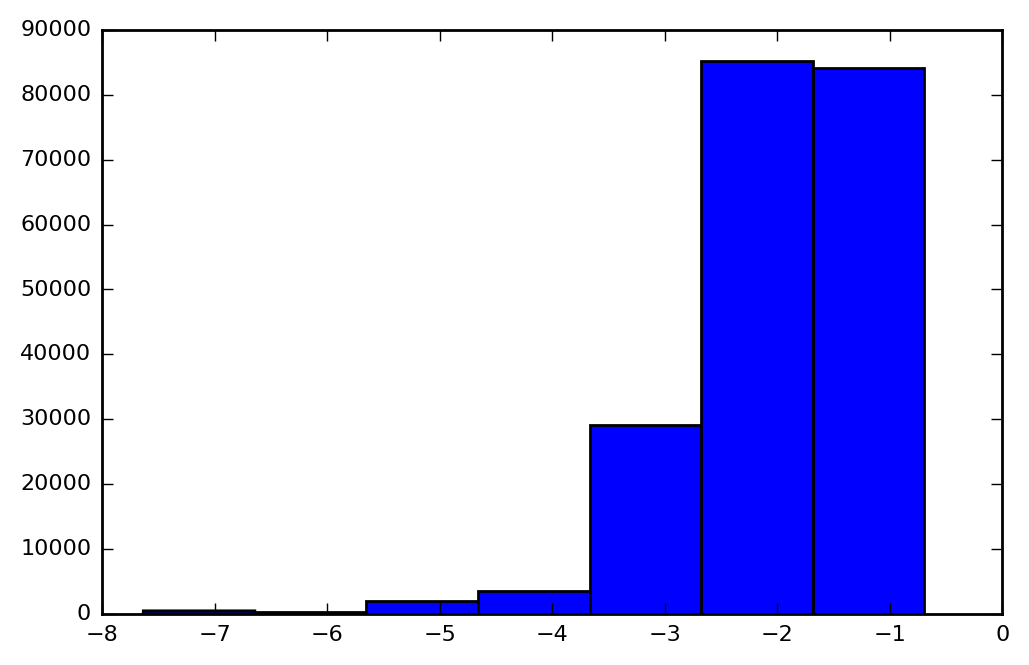

[-7.6363 -6.9421 -6.2479 -5.5537 -4.8595 -4.1653 -3.4711 -2.7768 -2.0826
 -1.3884 -0.6942]


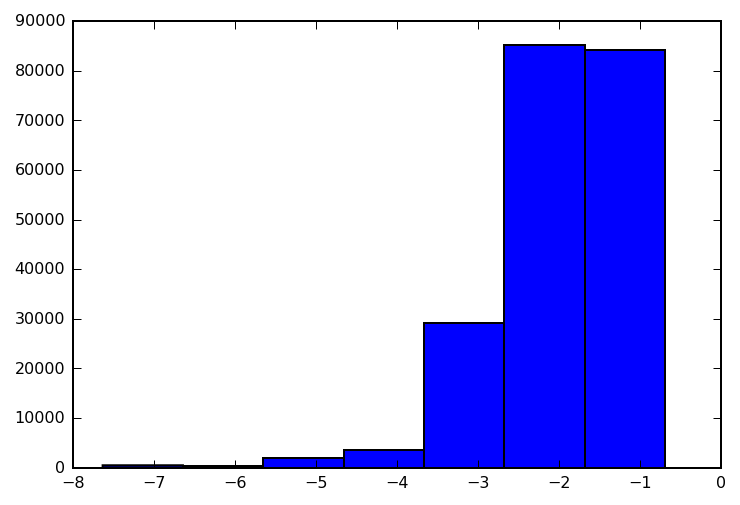

In [53]:
sf_targets = edgeslist_targets[3, :, :].real
print (np.unique(np.log2(sf_targets).ravel()))
_ = plt.hist(np.log2(sf_targets).ravel(), 7)

#### relation between activity and scale

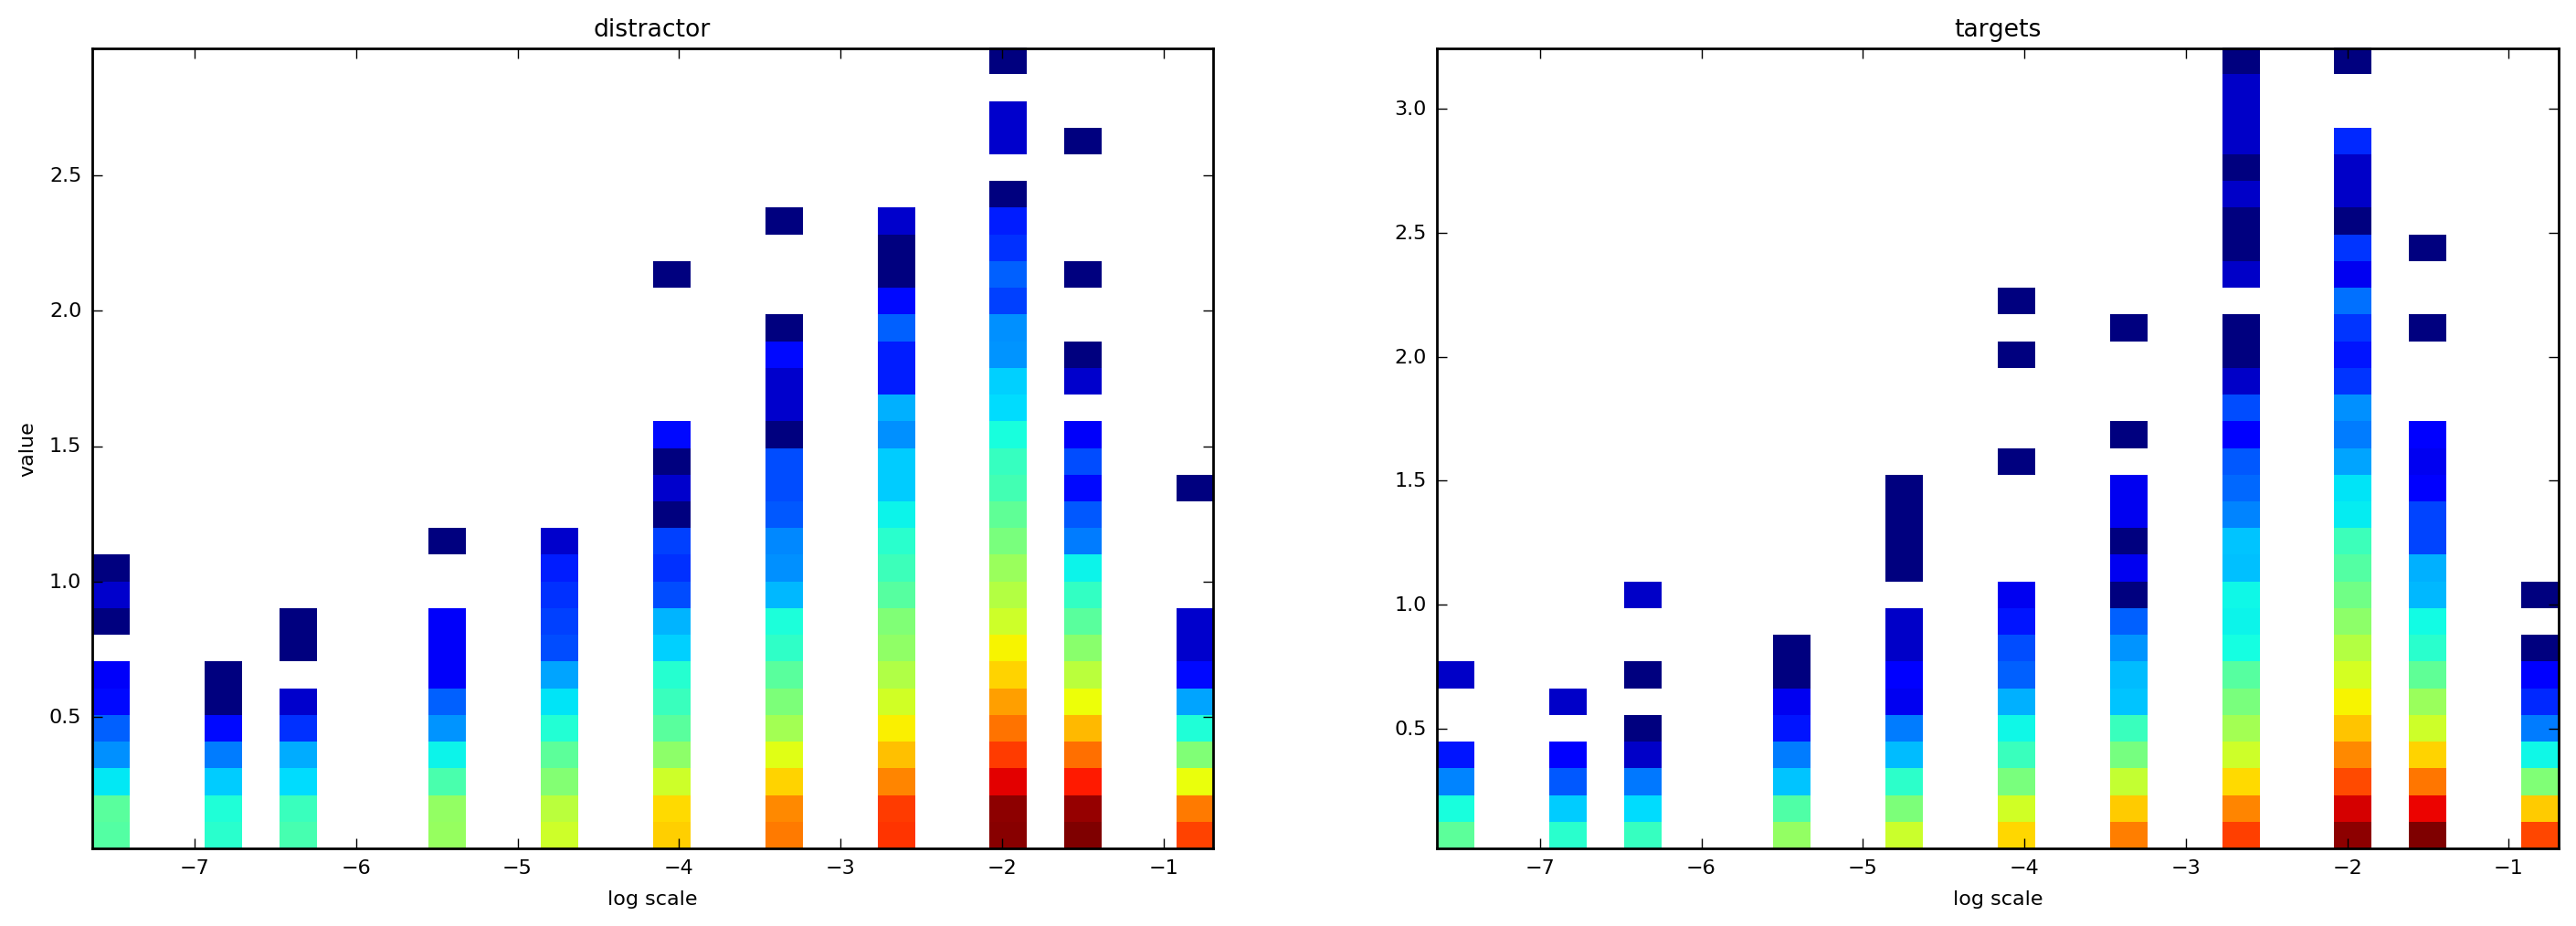

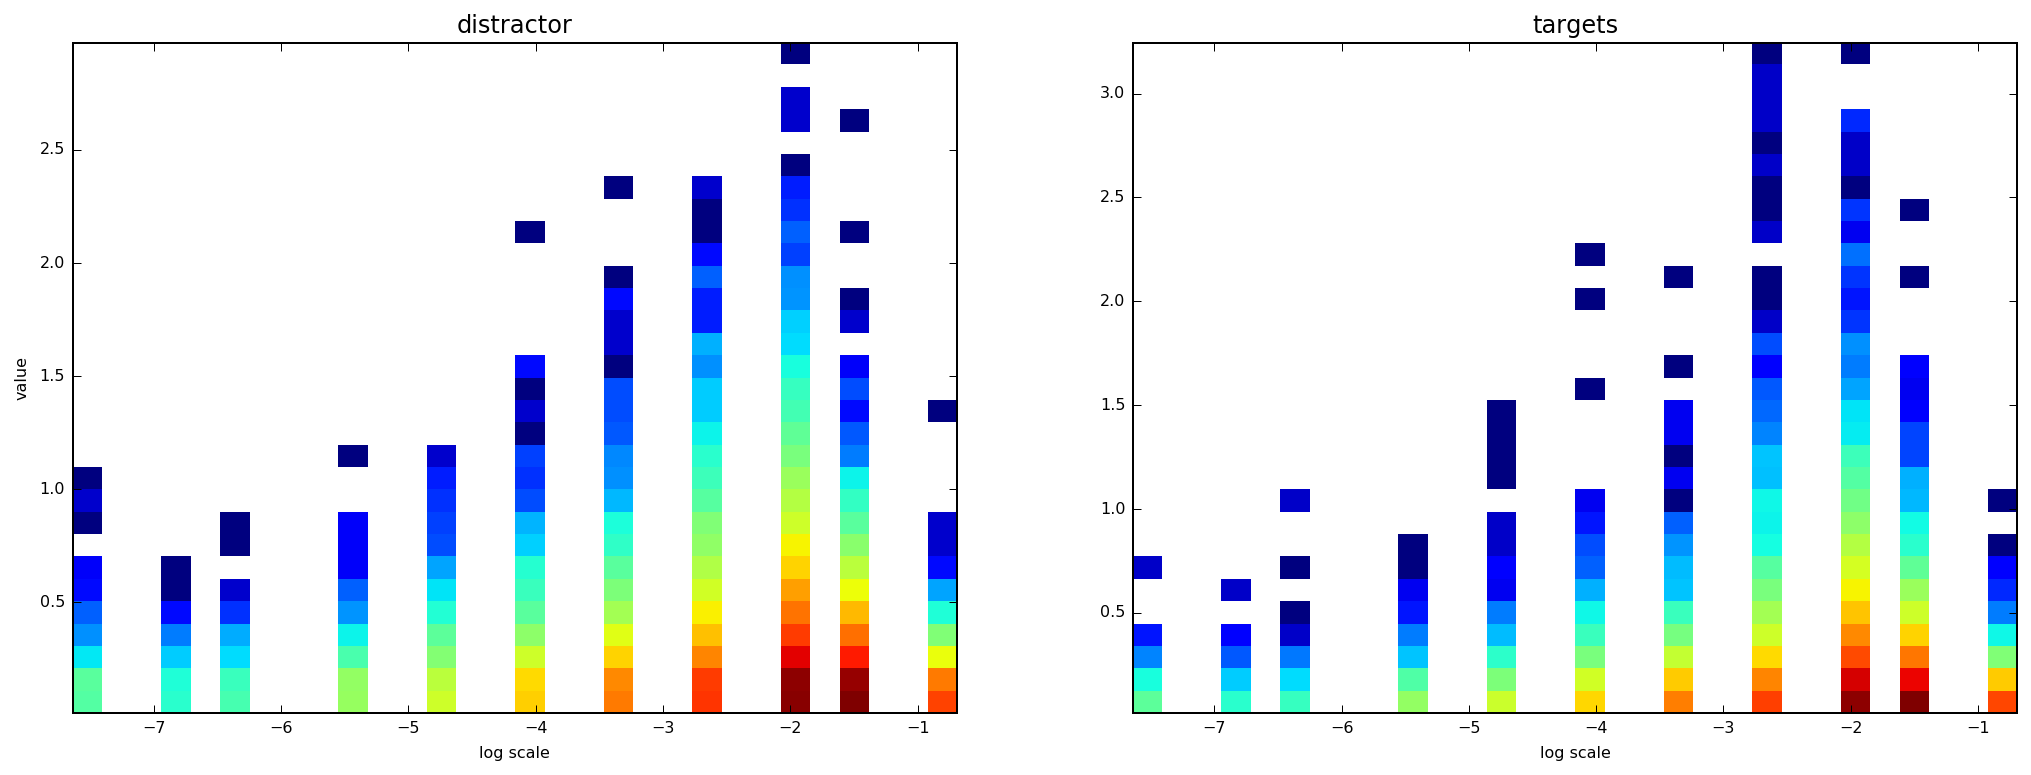

In [54]:
sf_targets = np.log2(edgeslist_targets[3, :, :].real)
sf_distractors = np.log2(edgeslist_distractors[3, :, :].real)
#_ = plt.scatter(np.log2(sf_targets).ravel(), (np.absolute(Value_targets)).ravel())
fig = plt.figure(figsize=(18, 6))
ax1 = fig.add_subplot(121); ax2 = fig.add_subplot(122)
ax1.set_ylabel('value'); ax2.set_xlabel('log scale'); ax1.set_xlabel('log scale')
ax1.set_title('distractor'); ax2.set_title('targets')
_ = ax1.hist2d(sf_targets.ravel(), value_distractors.ravel(), 30, norm=matplotlib.colors.LogNorm())
_ = ax2.hist2d(sf_distractors.ravel(), value_targets.ravel(), 30, norm=matplotlib.colors.LogNorm())

Angles

In [55]:
theta_targets = edgeslist_targets[2, :, 0].ravel().real
theta_distractors = edgeslist_distractors[2,  :, 0].ravel().real
mp.init_edges()
print (mp.edges_theta * 180 / np.pi)
print (theta_targets * 180 / np.pi)

[-86.25 -78.75 -71.25 -63.75 -56.25 -48.75 -41.25 -33.75 -26.25 -18.75
 -11.25  -3.75   3.75  11.25  18.75  26.25  33.75  41.25  48.75  56.25
  63.75  71.25  78.75  86.25  93.75]
[ 82.5 -52.5  75.  ..., -37.5 -30.   67.5]
[-86.25 -78.75 -71.25 -63.75 -56.25 -48.75 -41.25 -33.75 -26.25 -18.75
 -11.25  -3.75   3.75  11.25  18.75  26.25  33.75  41.25  48.75  56.25
  63.75  71.25  78.75  86.25  93.75]
[ 82.5 -52.5  75.  ..., -37.5 -30.   67.5]


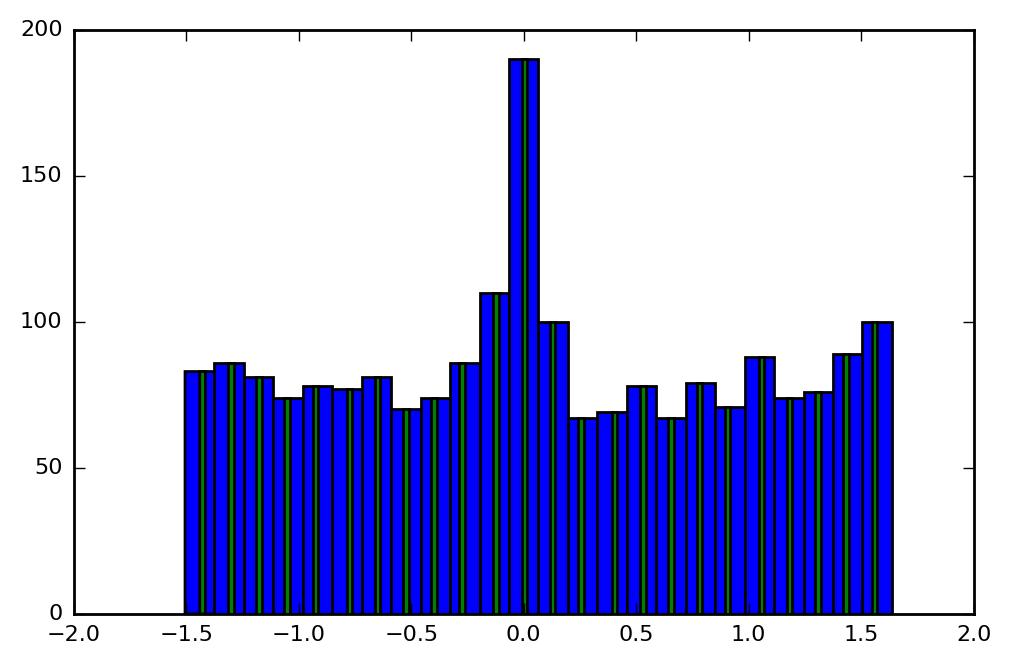

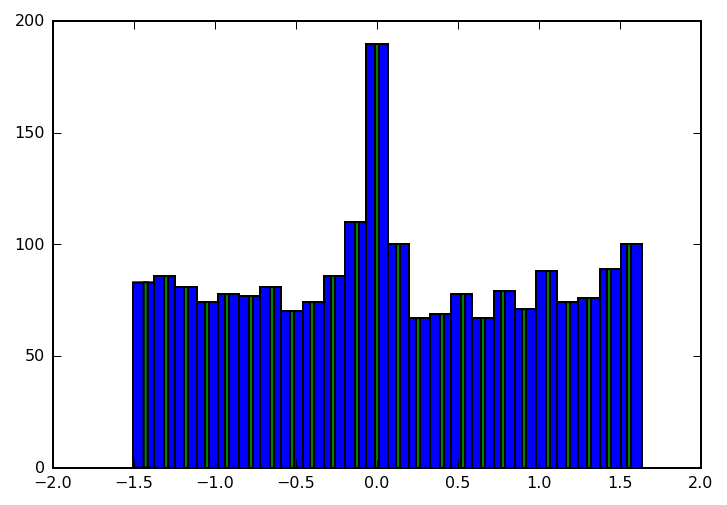

In [56]:
_ = plt.hist(theta_targets, bins=mp.edges_theta)
_ = plt.hist(theta_targets, bins=120)

### Second order statistics

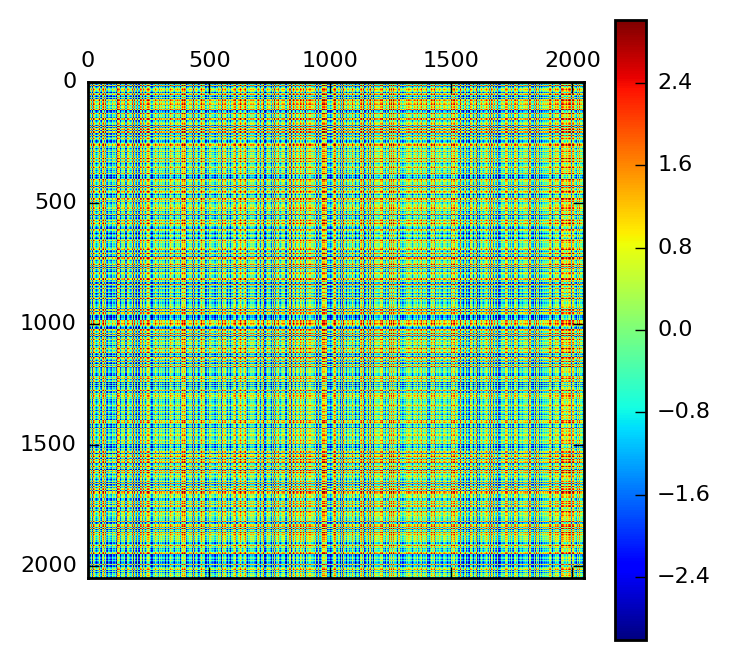

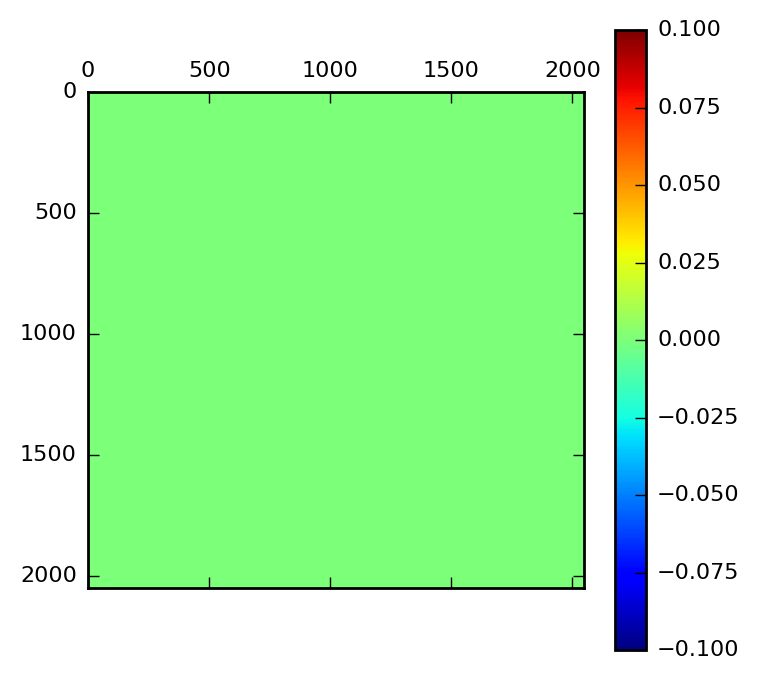

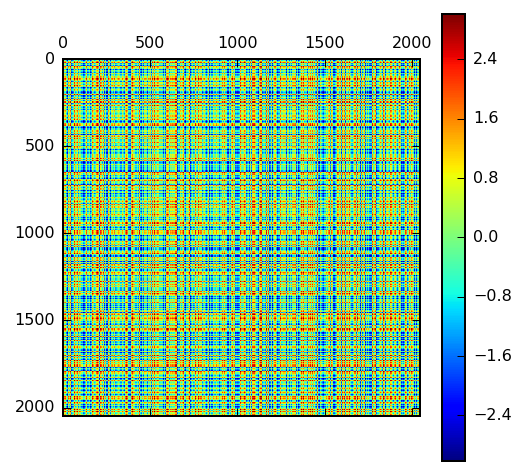

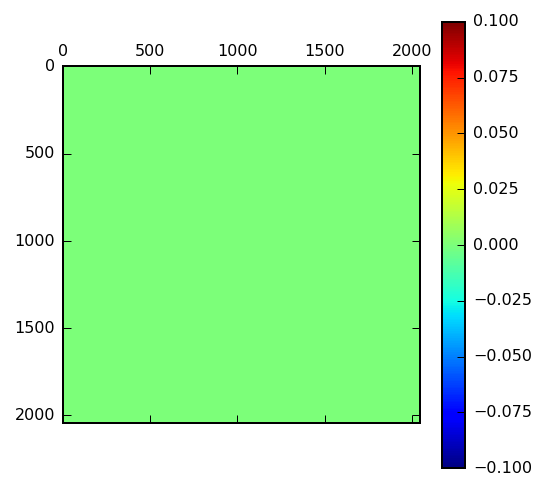

In [57]:
theta = theta_targets[:, np.newaxis] - theta_targets[np.newaxis, :]
plt.matshow(theta)
plt.colorbar()
plt.matshow(np.sin(theta + theta.T)); plt.colorbar()

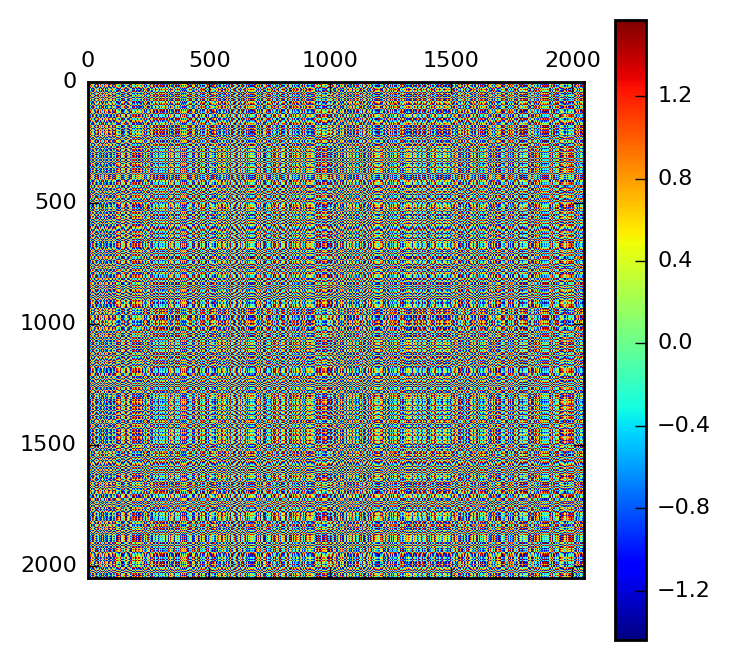

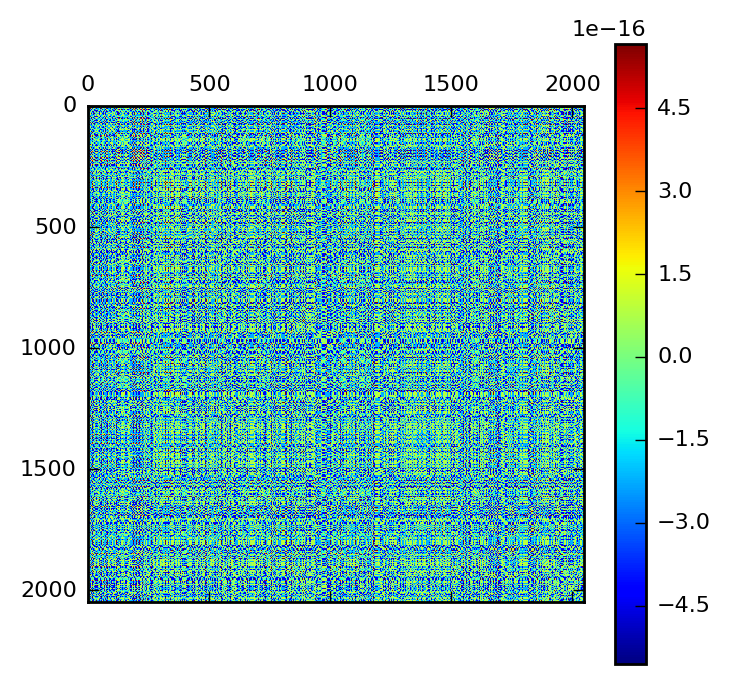

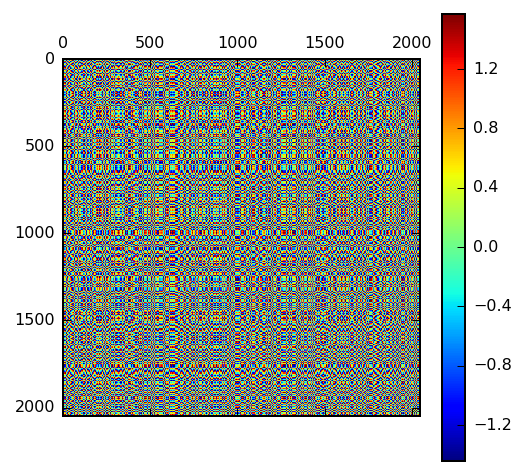

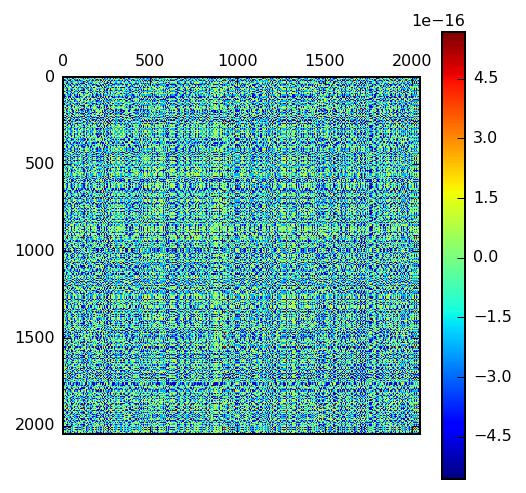

In [58]:
theta = ((theta + np.pi/2 - np.pi/mp.pe.N_Dtheta/4)  % (np.pi) ) - np.pi/2  + np.pi/mp.pe.N_Dtheta/4
plt.matshow(theta)
plt.colorbar()
plt.matshow(np.sin(theta + theta.T)); plt.colorbar()

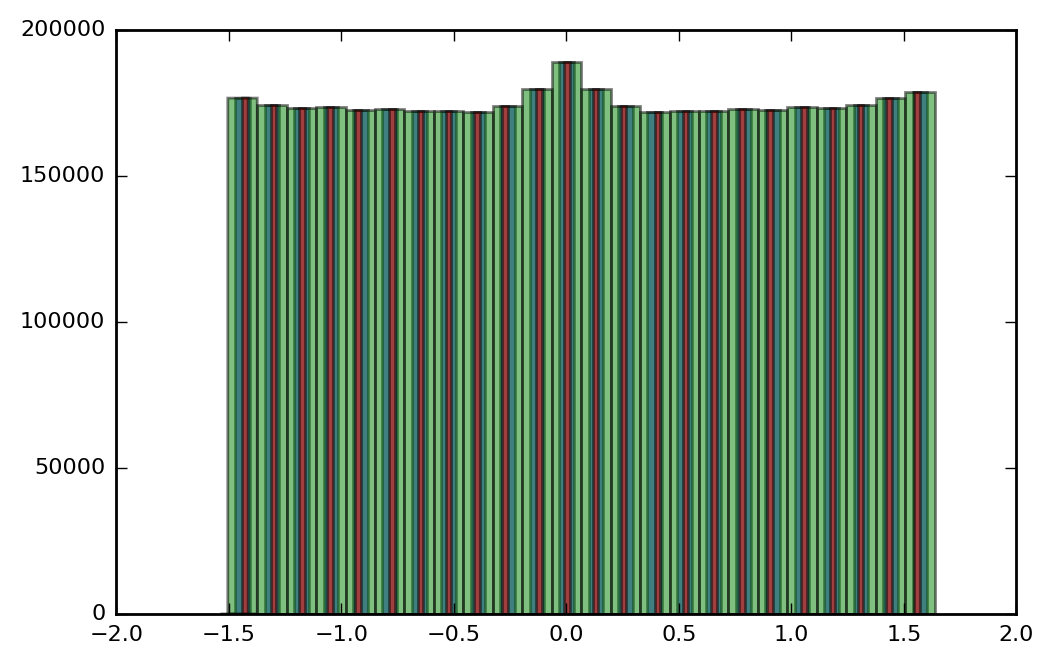

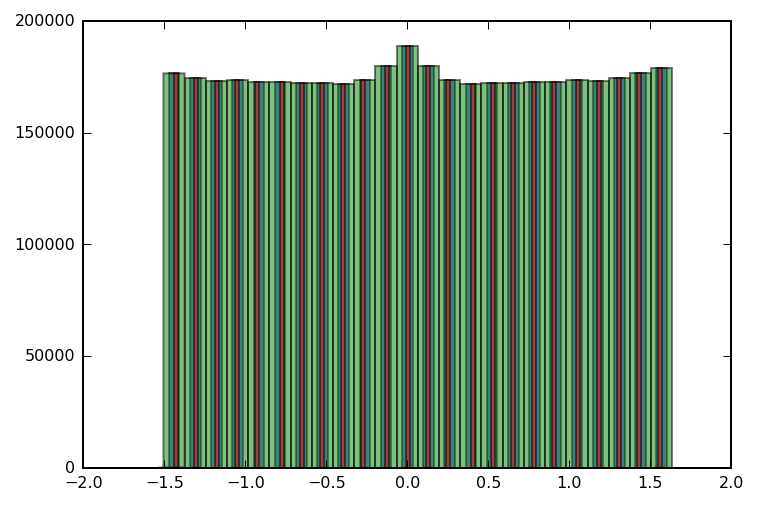

In [59]:
_ = plt.hist(theta.ravel(), bins=np.linspace(-np.pi/2, np.pi/2, 2*mp.pe.N_Dtheta+1) + np.pi/mp.pe.N_Dtheta/4, alpha=.5)
_ = plt.hist(theta.ravel(), bins=mp.edges_theta, alpha=.5)
_ = plt.hist(theta.ravel(), bins=120, alpha=.5)

In [60]:
%cd ../notebooks

/Users/lolo/pool/science/BICV/SparseEdges/notebooks
/Users/lolo/pool/science/BICV/SparseEdges/notebooks


## some book keeping for the notebook

In [61]:
%install_ext https://raw.githubusercontent.com/rasbt/python_reference/master/ipython_magic/watermark.py
%load_ext watermark
%watermark

02/09/2016 09:49:06

CPython 3.5.2
IPython 5.1.0

compiler   : GCC 4.2.1 Compatible Apple LLVM 7.3.0 (clang-703.0.31)
system     : Darwin
release    : 15.6.0
machine    : x86_64
processor  : i386
CPU cores  : 8
interpreter: 64bit
The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
02/09/2016 09:51:51

CPython 3.5.2
IPython 5.1.0

compiler   : GCC 4.2.1 Compatible Apple LLVM 7.3.0 (clang-703.0.31)
system     : Darwin
release    : 15.6.0
machine    : x86_64
processor  : i386
CPU cores  : 8
interpreter: 64bit


In [62]:
%install_ext http://raw.github.com/jrjohansson/version_information/master/version_information.py
%load_ext version_information
%version_information numpy, scipy, matplotlib, sympy

Software versions
Python 3.5.2 64bit [GCC 4.2.1 Compatible Apple LLVM 7.3.0 (clang-703.0.31)]
IPython 5.1.0
OS Darwin 15.6.0 x86_64 i386 64bit
numpy 1.11.1
scipy 0.18.0
matplotlib 1.5.2
sympy 1.0
Fri Sep 02 09:49:06 2016 CEST

The version_information extension is already loaded. To reload it, use:
  %reload_ext version_information


Software versions
Python 3.5.2 64bit [GCC 4.2.1 Compatible Apple LLVM 7.3.0 (clang-703.0.31)]
IPython 5.1.0
OS Darwin 15.6.0 x86_64 i386 64bit
numpy 1.11.1
scipy 0.18.0
matplotlib 1.5.2
sympy 1.0
Fri Sep 02 09:51:51 2016 CEST